In [595]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn import linear_model
from sklearn.linear_model import TweedieRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


from math import sqrt

import math

import folium

%matplotlib inline

In [596]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

from itertools import groupby
from operator import itemgetter

from mpl_toolkits.mplot3d import Axes3D

import mlxtend

from mlxtend.preprocessing import minmax_scaling

In [3]:
parse_dates = ['date']

covid_tigeryi = pd.read_csv("covid_tigeryi.csv", parse_dates=parse_dates, index_col=False)

covid_tigeryi.head()

,state,state_code,date,cases,positive,probableCases,negative,totalTestResults,death,hospitalized,total,positive_rate,positive_negative_ratio,positive_delta,negative_delta,totalTestResults_delta,death_delta,positive_rate_delta,positive_negative_ratio_delta
0,Alabama,AL,2020-03-07,0,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,AL,2020-03-08,0,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN
2,Alabama,AL,2020-03-09,0,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN
3,Alabama,AL,2020-03-10,0,0.0,NaN,0.0,0.0,NaN,NaN,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN
4,Alabama,AL,2020-03-11,3,0.0,NaN,10.0,10.0,NaN,NaN,10,0.0,0.0,0.0,10.0,10.0,NaN,0.0,0.0


In [4]:
demographic_tigeryi = pd.read_csv("demographic_tigeryi.csv", index_col=False)

demographic_tigeryi.head()

,county,state_code,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,total_votes20,...,state,cases,deaths,dem_16_margin,dem_20_margin,dem_margin_shift,cases_rate,deaths_rate,men_percent,women_percent
0,Abbeville,SC,62.868333,34.613950,10724.0,6742.0,3712.0,66.074157,32.984799,12433.0,...,South Carolina,808.0,18.0,-28.254383,-33.089359,-4.834976,3.259642,0.072616,48.588026,51.411974
1,Acadia,LA,77.262105,20.587161,27386.0,21159.0,5638.0,79.493404,19.148637,28425.0,...,Louisiana,3291.0,103.0,-56.674943,-60.344767,-3.669824,5.256601,0.164518,48.609580,51.390420
2,Accomack,VA,54.471596,42.761028,15755.0,8582.0,6737.0,54.150431,44.739639,16938.0,...,Virginia,1229.0,19.0,-11.710568,-9.410792,2.299776,3.742387,0.057856,48.961632,51.038368
3,Ada,ID,47.931611,38.691733,195587.0,93748.0,75676.0,50.387256,46.470359,259389.0,...,Idaho,17828.0,184.0,-9.239878,-3.916897,5.322981,4.097289,0.042287,50.101237,49.898763
4,Adair,IA,65.336526,29.981378,3759.0,2456.0,1127.0,69.734640,28.615826,4183.0,...,Iowa,250.0,1.0,-35.355148,-41.118814,-5.763667,3.476085,0.013904,49.388209,50.611791


In [5]:
election_tigeryi = pd.read_csv("election_tigeryi.csv", index_col=False)

election_tigeryi.head()

,state,called,final,dem_2020,rep_2020,other_2020,dem_percent,rep_percent,other_percent,dem_2020_margin,...,vote_change,state_code,EV,dem_2016,rep_2016,2016 Margin,Total 2016 Votes,Total 2020 Votes,usa_state_latitude,usa_state_longitude
0,U.S. Total,D,No,81281890,74222108,2884357,51.318097,46.860836,1.821066,4.457261,...,15.916665,NaN,NaN,NaN,NaN,2.099456,136639848,158388355,NaN,NaN
1,Arizona,D,Yes,1672143,1661686,53497,49.364691,49.055981,1.579328,0.308710,...,31.640451,AZ,11.0,1161167.0,1252401.0,-3.545595,2573165,3387326,34.048928,-111.093731
2,Florida,R,Yes,5297045,5668731,101680,47.861451,51.219820,0.918730,-3.358369,...,17.488431,FL,29.0,4504975.0,4617886.0,-1.198626,9420039,11067456,27.664827,-81.515754
3,Georgia,D,Yes,2474507,2461837,62138,49.505170,49.251693,1.243137,0.253477,...,22.141408,GA,16.0,1877963.0,2089104.0,-5.131343,4092373,4998482,32.157435,-82.907123
4,Iowa,R,Yes,759061,897672,34138,44.891716,53.089325,2.018959,-8.197609,...,7.971745,IA,6.0,653669.0,800983.0,-9.406838,1566031,1690871,41.878003,-93.097702


In [6]:
poll_tigeryi = pd.read_csv("poll_tigeryi.csv", index_col=False, parse_dates=parse_dates)

poll_tigeryi.head()

,state,date,rep_poll_2020,dem_poll_2020,dem_lead,dem_lead_rolling_7,usa_state_code,usa_state_latitude,usa_state_longitude,dem_lead_rolling_30,called,dem_percent,rep_percent,dem_2020_margin,dem_result_poll_diff,rep_result_poll_diff,dem_lead_result_poll_diff,dem_lead_rolling_7_diff,dem_lead_rolling_30_diff
0,Alabama,2020-02-27,59.14228,38.22156,-20.92072,-20.920720,AL,32.318231,-86.902298,-20.920720,R,36.56999,62.031643,-25.461653,-1.65157,2.889363,-4.540933,-4.540933,-4.540933
1,Alabama,2020-02-28,59.17695,38.39190,-20.78505,-20.852885,AL,32.318231,-86.902298,-20.852885,R,36.56999,62.031643,-25.461653,-1.82191,2.854693,-4.676603,-4.608768,-4.608768
2,Alabama,2020-02-29,59.23509,38.38301,-20.85208,-20.852617,AL,32.318231,-86.902298,-20.852617,R,36.56999,62.031643,-25.461653,-1.81302,2.796553,-4.609573,-4.609036,-4.609036
3,Alabama,2020-03-01,59.23509,38.38301,-20.85208,-20.852483,AL,32.318231,-86.902298,-20.852483,R,36.56999,62.031643,-25.461653,-1.81302,2.796553,-4.609573,-4.609170,-4.609170
4,Alabama,2020-03-02,59.23489,38.38627,-20.84862,-20.851710,AL,32.318231,-86.902298,-20.851710,R,36.56999,62.031643,-25.461653,-1.81628,2.796753,-4.613033,-4.609943,-4.609943


In [915]:
def poll_state(poll_tigeryi, state="Florida", usa_state_code=None):
    if state in poll_tigeryi['state'].tolist():
        poll_state = poll_tigeryi[poll_tigeryi['state']==state]
    elif usa_state_code in poll_tigeryi['usa_state_code'].tolist():
        poll_state = poll_tigeryi[poll_tigeryi['usa_state_code']==usa_state_code]
    else:
        raise ValueError("state not valid")
        
    actual_result = poll_state['dem_2020_margin'].tolist()[0]
    actual_result = np.round(actual_result, 3)
    
    poll_average = np.mean(poll_state["dem_lead"])
    poll_average = np.round(poll_average, 3)
    
    last_month_avg = np.mean(poll_state["dem_lead"][-31:-1])
    last_month_avg = np.round(last_month_avg, 3)
    
    error_average = np.mean(poll_state["dem_lead_result_poll_diff"])
    error_average = np.round(error_average, 3)
    
    last_month_error = np.mean(poll_state["dem_lead_result_poll_diff"][-31:-1])
    last_month_error = np.round(last_month_error, 3)
    
    plt.subplots(figsize = (15,5))
    
    plt.subplot(1,2,1)
    
    plt.plot(poll_state["date"], [poll_average]*len(poll_state["date"]), "green", label=f"overall polls avg {poll_average}%")
    plt.plot(poll_state["date"], [last_month_avg]*len(poll_state["date"]), "purple", label=f"last month polls avg {last_month_avg}%")
    plt.plot(poll_state["date"], poll_state["dem_lead"], "-" , label="national polls daily") # 
    plt.plot(poll_state["date"], poll_state["dem_2020_margin"], "r-", label=f"actual election result {actual_result}%")
    plt.legend(loc="lower right")
    plt.xlabel("Date")
    plt.xticks(rotation = 25)
    plt.ylabel("DEM Lead or Deficit vs. REP (%)")
    
    plt.title(f"National Polls Margin DEM - REP in {state or usa_state_code}")  
    
    
    plt.subplot(1,2,2)
    
    plt.title(f"Polls Error for DEM Lead in {state or usa_state_code}")
    
    plt.plot(poll_state["date"], poll_state["dem_lead_result_poll_diff"], "-" , label="national polls error")
    plt.xlabel("Date")
    plt.xticks(rotation = 25)
    plt.ylabel("Polls Error: DEM Lead Margin - Elction Result (%)")
    plt.plot(poll_state["date"], [0]*len(poll_state["date"]), "red", label="no error perfect poll 0%")
    
    plt.plot(poll_state["date"], [error_average]*len(poll_state["date"]), "green", label=f"overall polls error avg {error_average}%")
    plt.plot(poll_state["date"], [last_month_error]*len(poll_state["date"]), "purple", label=f"last month polls error avg {last_month_error}%")

    
    plt.legend(loc="upper right")
    
    
    #return poll_state
    

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


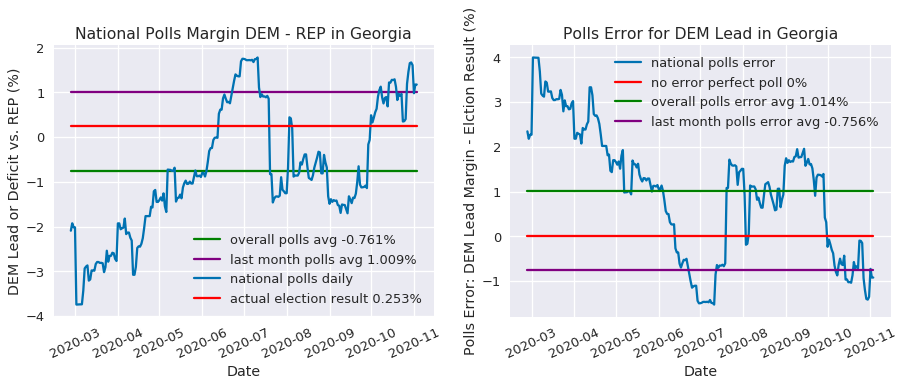

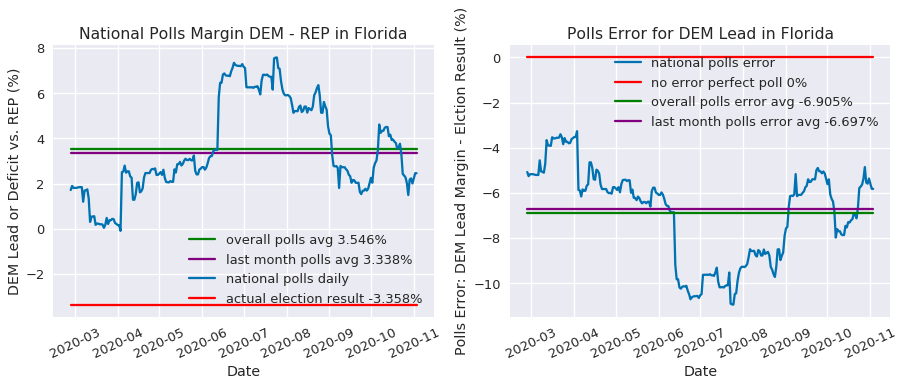

In [916]:
poll_state(poll_tigeryi, "Georgia")
poll_state(poll_tigeryi, "Florida")




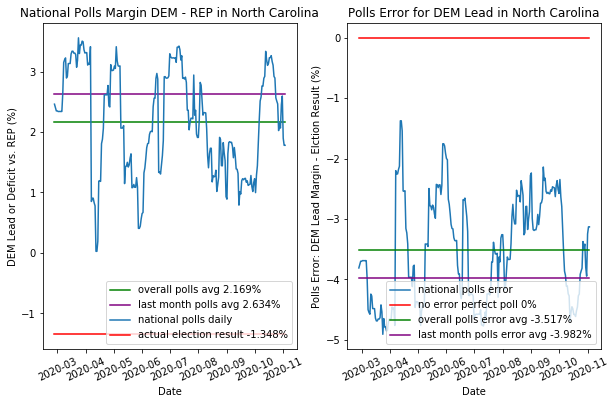

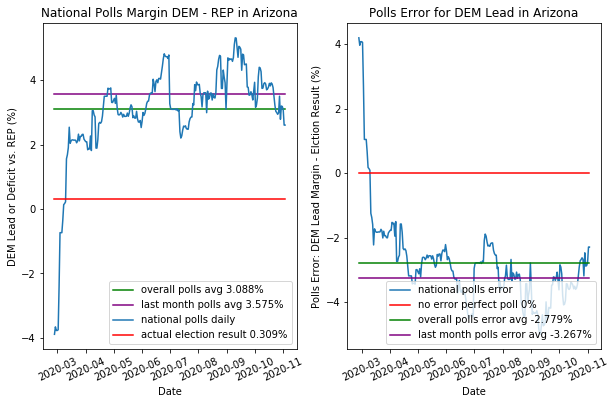

In [10]:
poll_state(poll_tigeryi, "North Carolina")
poll_state(poll_tigeryi, "Arizona")


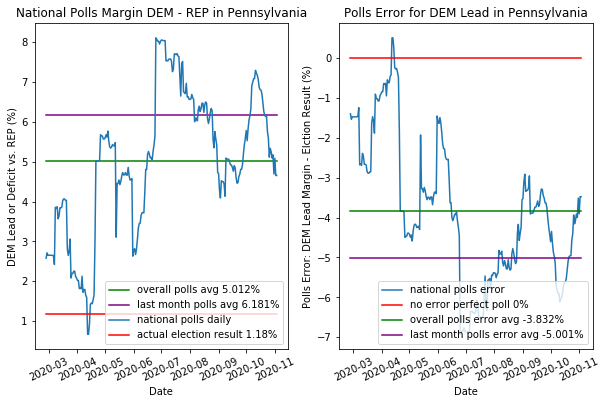

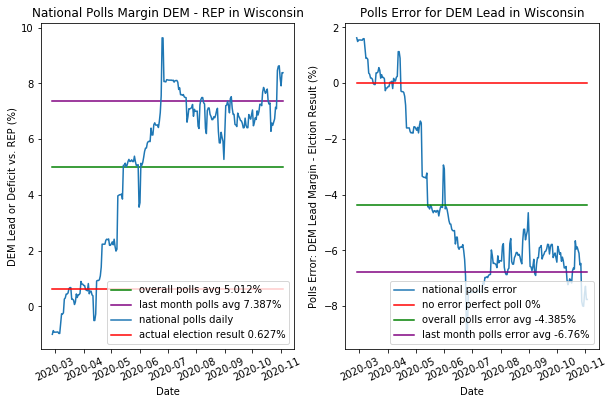

In [11]:
poll_state(poll_tigeryi, "Pennsylvania")
poll_state(poll_tigeryi, "Wisconsin")



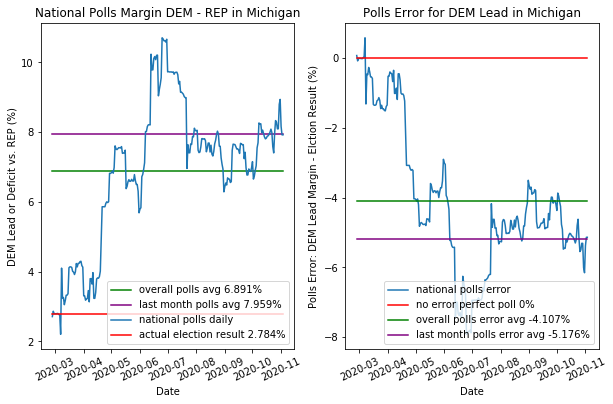

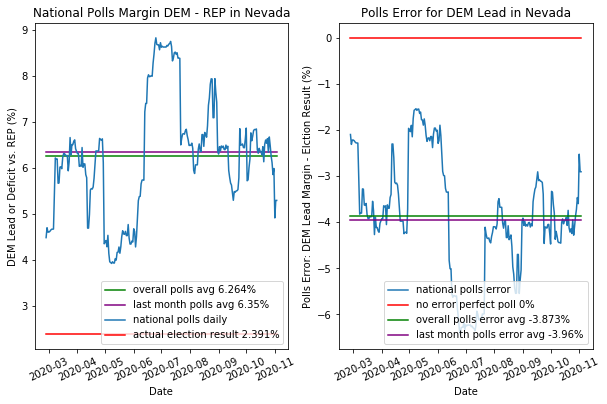

In [12]:
poll_state(poll_tigeryi, "Michigan")
poll_state(poll_tigeryi, "Nevada")

In [346]:
# df222 = poll_tigeryi[poll_tigeryi['state']=='Wisconsin']#.loc['2020-06-01':]
# df222 = df222.set_index(['date'])
# df222.loc['2020-6-1':'2020-11-03']
# mask = (df222['date'] >= '2020-03-01') & (df222['date'] <= '2020-11-03')
# df222.loc[mask]
# df222["dem_lead"][-3:-1]

In [354]:
poll_covid = pd.merge(poll_tigeryi, covid_tigeryi, how = 'inner',
                      left_on = ['state', 'date','usa_state_code'], right_on = ['state', 'date','state_code']
                     )

In [359]:
poll_covid = poll_covid.dropna(subset=['death_delta','death'], axis=0)



In [366]:
# poll_covid = poll_covid.drop(5197,axis=0)

In [388]:
poll_covid['positive_delta_rolling7'] = poll_covid['positive_delta'].rolling(7, min_periods = 0).mean()
poll_covid['negative_delta_rolling7'] = poll_covid['negative_delta'].rolling(7, min_periods = 0).mean()
poll_covid['totalTestResults_delta_rolling7'] = poll_covid['totalTestResults_delta'].rolling(7, min_periods = 0).mean()
poll_covid['death_delta_rolling7'] = poll_covid['death_delta'].rolling(7, min_periods = 0).mean()

poll_covid['positive_rate_delta_rolling7'] = 100* poll_covid['positive_delta_rolling7']/poll_covid['totalTestResults_delta_rolling7']

poll_covid = poll_covid.replace(np.inf, np.nan)


In [398]:
mask = (poll_covid['positive_rate_delta_rolling7'] >= 0) & (poll_covid['positive_rate_delta_rolling7'] <= 100)
poll_covid = poll_covid.loc[mask]

In [400]:
poll_covid.to_csv('poll_covid_tigeryi.csv', index=False)

In [13]:
poll_covid = pd.read_csv('poll_covid_tigeryi.csv', parse_dates=parse_dates, index_col=False)

In [14]:
# poll_covid_nevada = poll_covid[poll_covid['state']=='Nevada']

In [195]:
def poll_cov(poll, state="Florida", usa_state_code=None):
    if state in poll['state'].tolist():
        poll_state = poll[poll['state']==state]
    elif usa_state_code in poll['usa_state_code'].tolist():
        poll_state = poll[poll['usa_state_code']==usa_state_code]
    else:
        raise ValueError("state not valid")
        
        
        
        
    actual_result = poll_state['dem_2020_margin'].tolist()[0]
    actual_result = np.round(actual_result, 3)
    
    poll_average = np.mean(poll_state["dem_lead_rolling_7"])
    poll_average = np.round(poll_average, 3)
    
    last_month_avg = np.mean(poll_state["dem_lead_rolling_7"][-31:-1])
    last_month_avg = np.round(last_month_avg, 3)
    
    error_average = np.mean(poll_state["dem_lead_rolling_7_diff"])
    error_average = np.round(error_average, 3)
    
    last_month_error = np.mean(poll_state["dem_lead_rolling_7_diff"][-31:-1])
    last_month_error = np.round(last_month_error, 3)
    
    
    plt.subplots(figsize = (20,20))
    
    plt.subplot(2,3,1)
    
    plt.plot(poll_state['date'],poll_state['positive_rate_delta_rolling7']) # positive_rate_delta_rolling7
    plt.legend(loc="lower right")
    plt.xlabel("Date")
    plt.xticks(rotation = 25)
    plt.ylabel("Covid-19 Positive Rate 7 day rolling (%)")
    
    plt.title(f"Covid-19 Positive Rate (7 day rolling) in {state or usa_state_code}")  
    
    
    plt.subplot(2,3,2)
    
    plt.title(f"National Polls Margin DEM - REP (7 day rolling) in {state or usa_state_code}")
    plt.plot(poll_state['date'], poll_state['dem_lead_rolling_7'], label="national polls DEM margin") 
    
    
    # add here
    plt.plot(poll_state["date"], [poll_average]*len(poll_state["date"]), "green", label=f"overall polls avg {poll_average}%")
    plt.plot(poll_state["date"], [last_month_avg]*len(poll_state["date"]), "purple", label=f"last month polls avg {last_month_avg}%")
    plt.plot(poll_state["date"], poll_state["dem_2020_margin"], "r-", label=f"actual election result {actual_result}%")
    
    
    
    plt.xlabel("Date")
    plt.xticks(rotation = 25)
    plt.ylabel("Nation Polls DEM Lead or Deficit vs. REP 7 day rolling (%)")
        
    plt.legend(loc="lower right")
    
    
    plt.subplot(2,3,3)
    
    
    plt.title(f"Polls Error of DEM Lead (7 day rolling) in {state or usa_state_code}")
    
    plt.plot(poll_state["date"], poll_state["dem_lead_rolling_7_diff"], "-" , label="national polls error")
    plt.xlabel("Date")
    plt.xticks(rotation = 25)
    plt.ylabel("Polls Error: DEM Lead Margin - Elction Result 7 day rolling (%)")
    
    # add here
    plt.plot(poll_state["date"], [0]*len(poll_state["date"]), "red", label="no error perfect poll 0%")
    plt.plot(poll_state["date"], [error_average]*len(poll_state["date"]), "green", label=f"overall polls error avg {error_average}%")
    plt.plot(poll_state["date"], [last_month_error]*len(poll_state["date"]), "purple", label=f"last month polls error avg {last_month_error}%")


    
        
    plt.legend(loc="lower right")
    
    
    
    plt.subplot(2,3,4)
    
    plt.title(f"Polls DEM - REP VS. Covid-19 Positive Rate in {state or usa_state_code}")
    
    X1 = poll_state['positive_rate_delta_rolling7']
    Y1 = poll_state['dem_lead_rolling_7']
    
    plt.scatter(X1, Y1, alpha=0.2, label='Poll DEM Lead')

    results = sm.WLS(Y1, sm.add_constant(X1), weights=list(range(0,len(X1)))).fit() # OLS
    X_plot = np.linspace(0, 20, 101)
    a1 = results.params[1]
    b1 = results.params[0]
    Y_plot = X_plot*a1 + b1
    plt.plot(X_plot, Y_plot, 'r-', label=f"y = {np.round(a1,2)}*x + {np.round(b1,2)}", alpha=0.8)
    plt.legend(loc="lower right")
    plt.xlabel("Covid daily postive rate (rolling 7 day average) %")
    plt.ylabel("Nation Polls DEM Lead or Deficit vs. REP 7 day rolling (%)")
             
    #print(results.params)
    #print(results.summary())
    print()
    
    
    
 
    plt.subplot(2,3,5)
    
    plt.title(f"Polls Error VS. Covid-19 Positive Rate in {state or usa_state_code}")
    
    X2 = poll_state['positive_rate_delta_rolling7']
    Y2 = poll_state['dem_lead_rolling_7_diff']
    plt.scatter(X2, Y2, alpha=0.2, label='polling error')

    results2 = sm.WLS(Y2, sm.add_constant(X2), weights=list(range(0,len(X2)))).fit()
    X_plot = np.linspace(0, 20, 101)
    a2 = results2.params[1]
    b2 = results2.params[0]
    Y_plot = X_plot*a2 + b2
    plt.plot(X_plot, Y_plot, 'r-', label=f"y = {np.round(a2,2)}*x + {np.round(b2,2)}", alpha=0.8)
    plt.legend(loc="upper right")
    plt.xlabel("Covid daily postive rate (rolling 7 day average) %")
    plt.ylabel("Polls Error: DEM Lead Margin - Elction Result 7 day rolling (%)")
    
    #print(results2.params)
    print(results2.summary())
    
        

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:764: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))



                               WLS Regression Results                              
Dep. Variable:     dem_lead_rolling_7_diff   R-squared:                       0.577
Model:                                 WLS   Adj. R-squared:                  0.576
Method:                      Least Squares   F-statistic:                     321.1
Date:                     Sat, 12 Dec 2020   Prob (F-statistic):           7.57e-46
Time:                             15:30:31   Log-Likelihood:                   -inf
No. Observations:                      237   AIC:                               inf
Df Residuals:                          235   BIC:                               inf
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

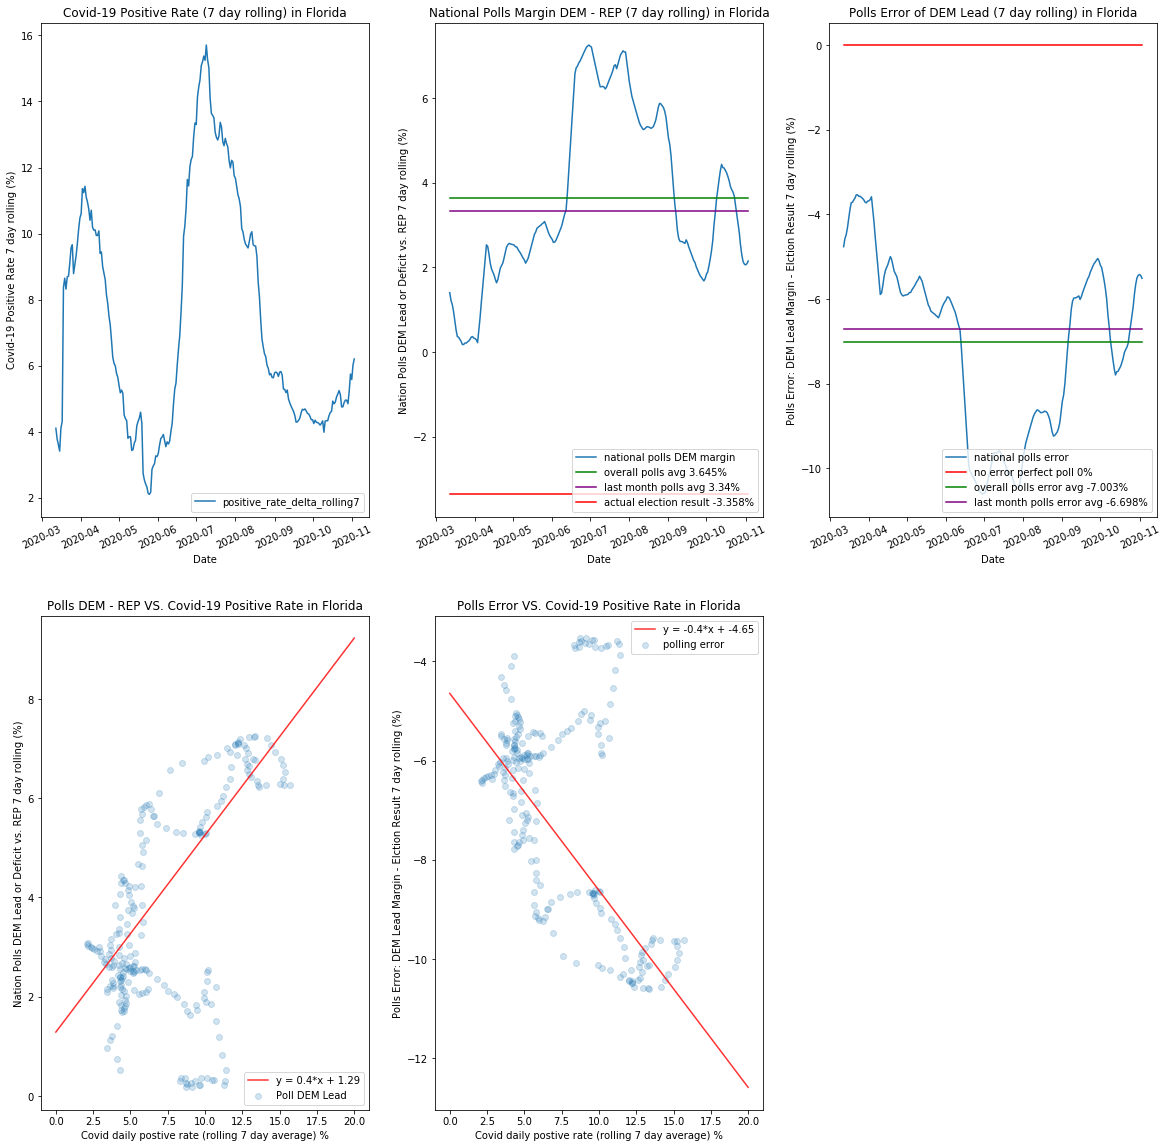

In [196]:

poll_cov(poll_covid, "Florida")


/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:764: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))



                               WLS Regression Results                              
Dep. Variable:     dem_lead_rolling_7_diff   R-squared:                       0.069
Model:                                 WLS   Adj. R-squared:                  0.065
Method:                      Least Squares   F-statistic:                     16.73
Date:                     Sat, 12 Dec 2020   Prob (F-statistic):           5.99e-05
Time:                             15:30:38   Log-Likelihood:                   -inf
No. Observations:                      228   AIC:                               inf
Df Residuals:                          226   BIC:                               inf
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

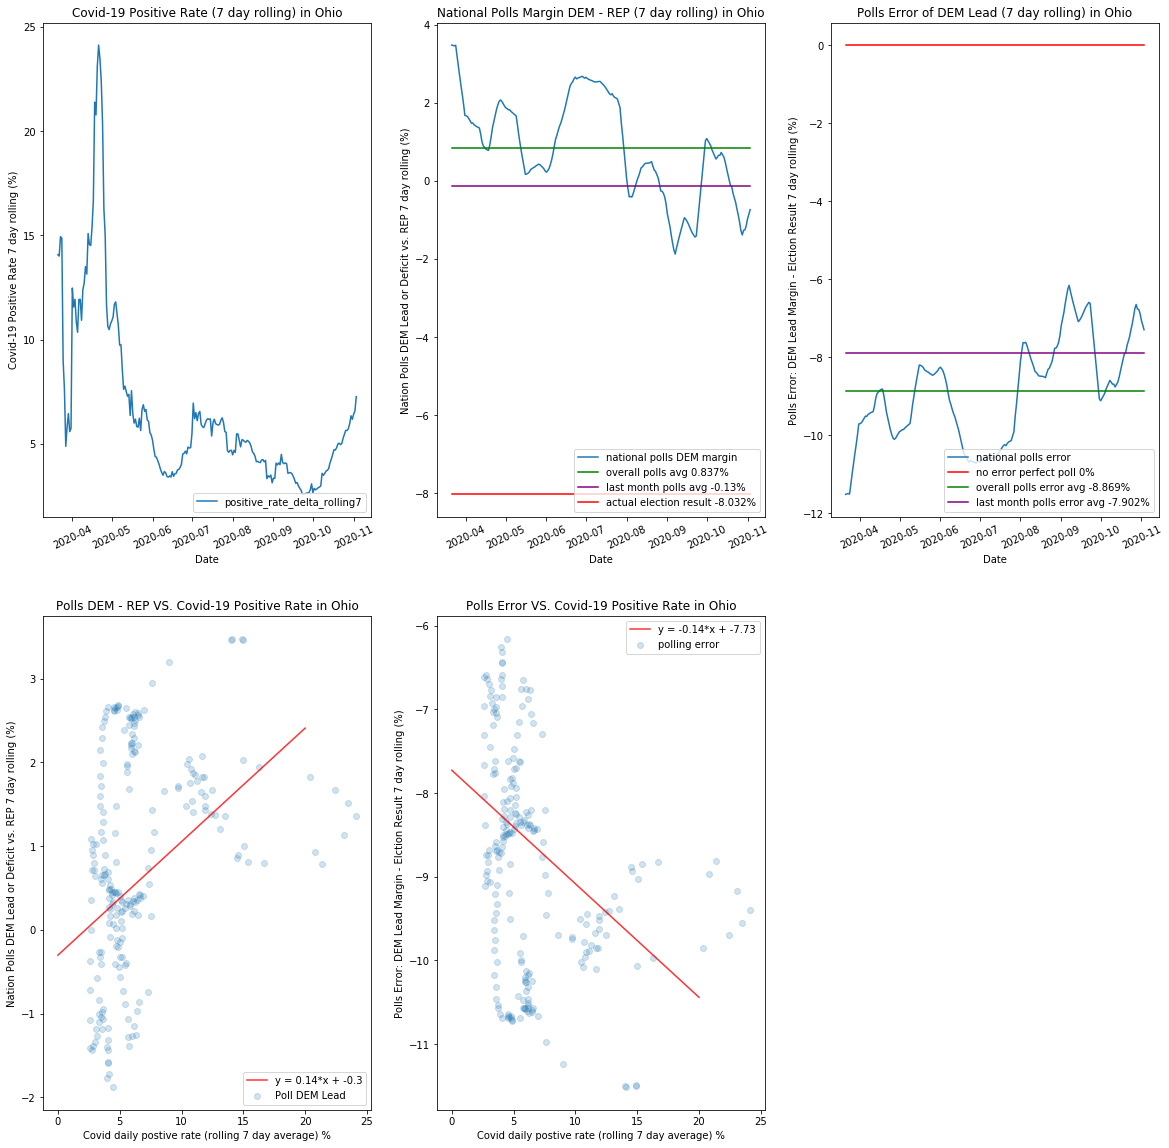

In [197]:
poll_cov(poll_covid, "Ohio")

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:764: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))



                               WLS Regression Results                              
Dep. Variable:     dem_lead_rolling_7_diff   R-squared:                       0.156
Model:                                 WLS   Adj. R-squared:                  0.152
Method:                      Least Squares   F-statistic:                     44.47
Date:                     Sat, 12 Dec 2020   Prob (F-statistic):           1.75e-10
Time:                             15:30:42   Log-Likelihood:                   -inf
No. Observations:                      243   AIC:                               inf
Df Residuals:                          241   BIC:                               inf
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

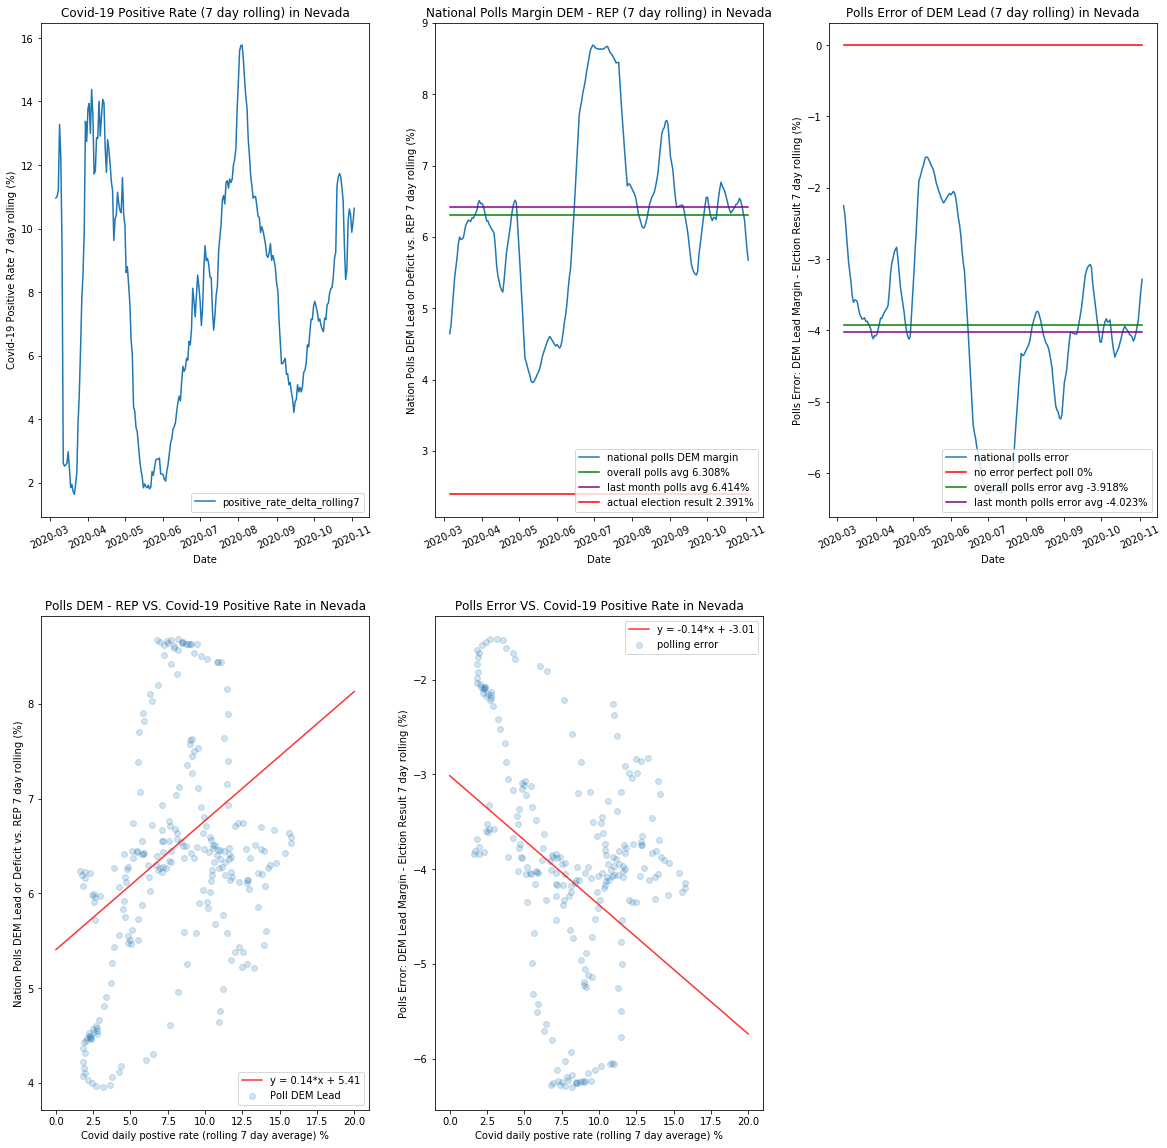

In [198]:
poll_cov(poll_covid, "Nevada")

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:764: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))



                               WLS Regression Results                              
Dep. Variable:     dem_lead_rolling_7_diff   R-squared:                       0.032
Model:                                 WLS   Adj. R-squared:                  0.028
Method:                      Least Squares   F-statistic:                     7.444
Date:                     Sat, 12 Dec 2020   Prob (F-statistic):            0.00687
Time:                             15:30:45   Log-Likelihood:                   -inf
No. Observations:                      225   AIC:                               inf
Df Residuals:                          223   BIC:                               inf
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

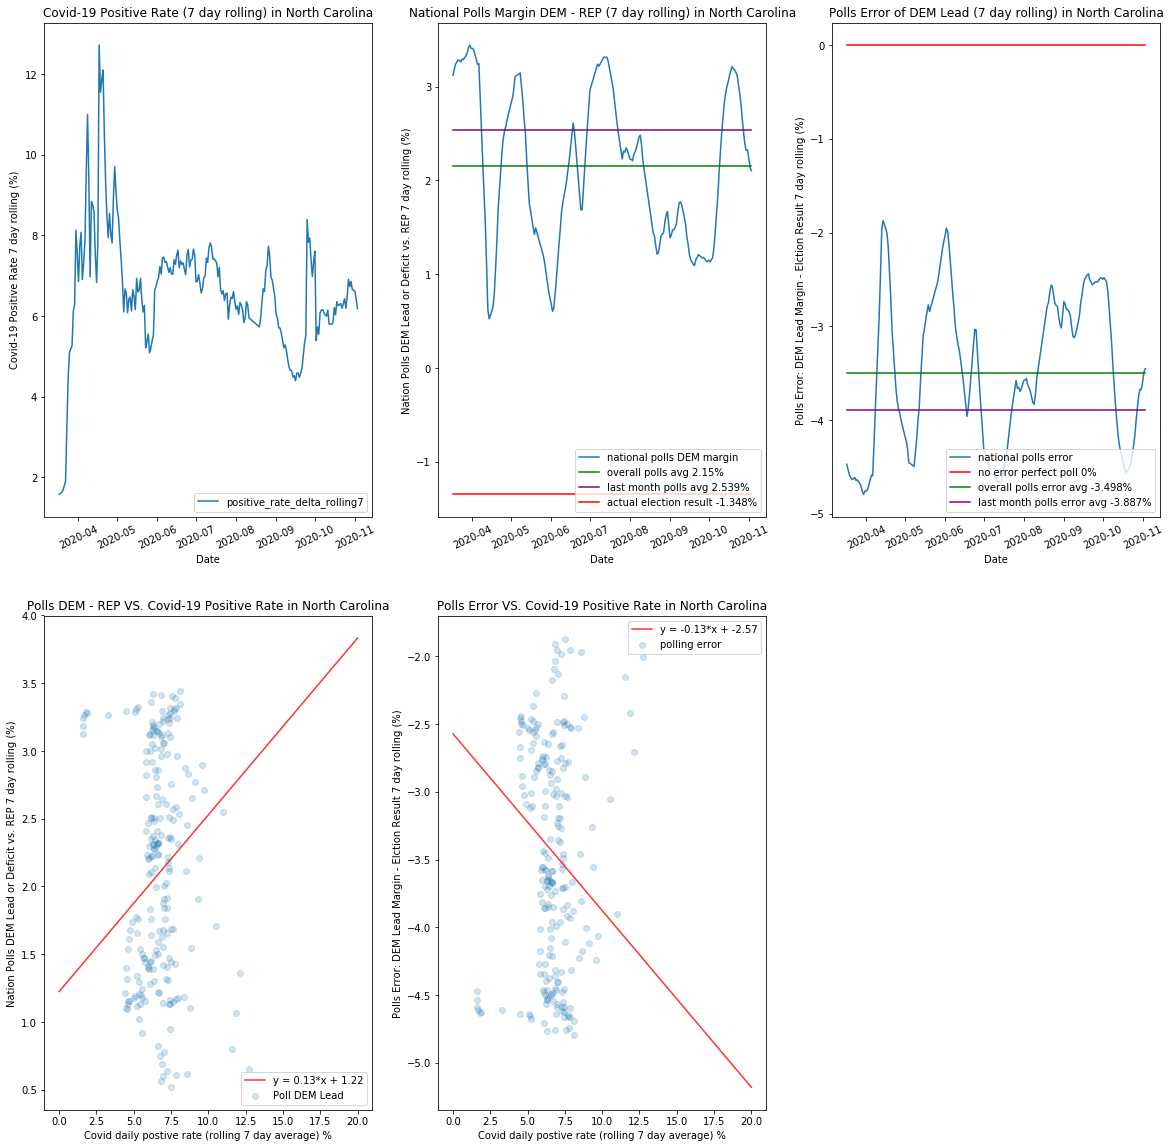

In [199]:
poll_cov(poll_covid, "North Carolina")



/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:764: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))



                               WLS Regression Results                              
Dep. Variable:     dem_lead_rolling_7_diff   R-squared:                       0.036
Model:                                 WLS   Adj. R-squared:                  0.032
Method:                      Least Squares   F-statistic:                     8.702
Date:                     Sat, 12 Dec 2020   Prob (F-statistic):            0.00350
Time:                             15:30:48   Log-Likelihood:                   -inf
No. Observations:                      235   AIC:                               inf
Df Residuals:                          233   BIC:                               inf
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

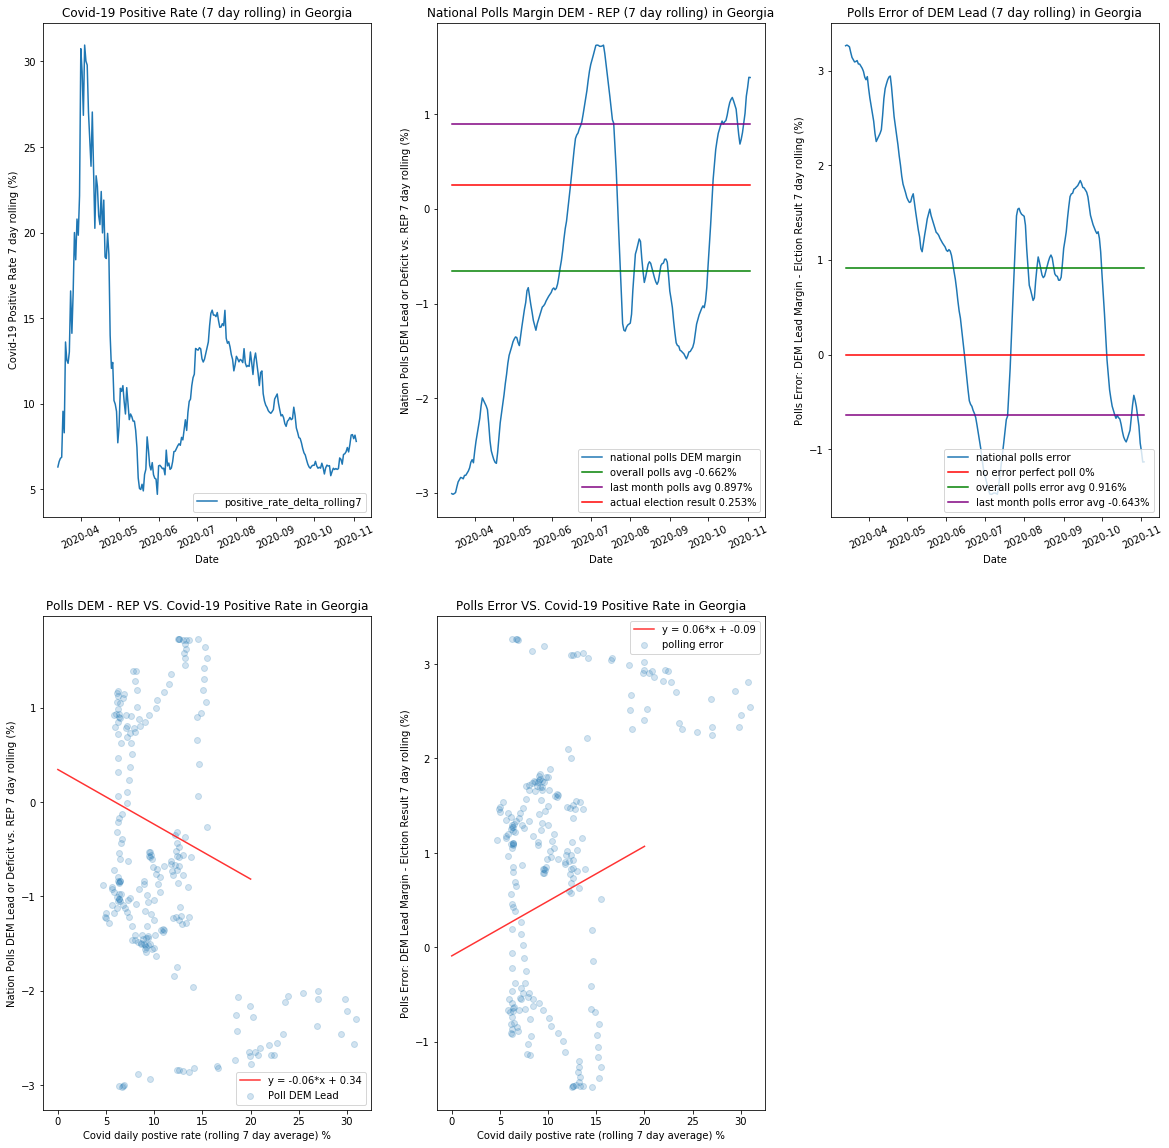

In [200]:
poll_cov(poll_covid, "Georgia")



/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:764: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))



                               WLS Regression Results                              
Dep. Variable:     dem_lead_rolling_7_diff   R-squared:                       0.142
Model:                                 WLS   Adj. R-squared:                  0.138
Method:                      Least Squares   F-statistic:                     37.81
Date:                     Sat, 12 Dec 2020   Prob (F-statistic):           3.46e-09
Time:                             15:30:51   Log-Likelihood:                   -inf
No. Observations:                      230   AIC:                               inf
Df Residuals:                          228   BIC:                               inf
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

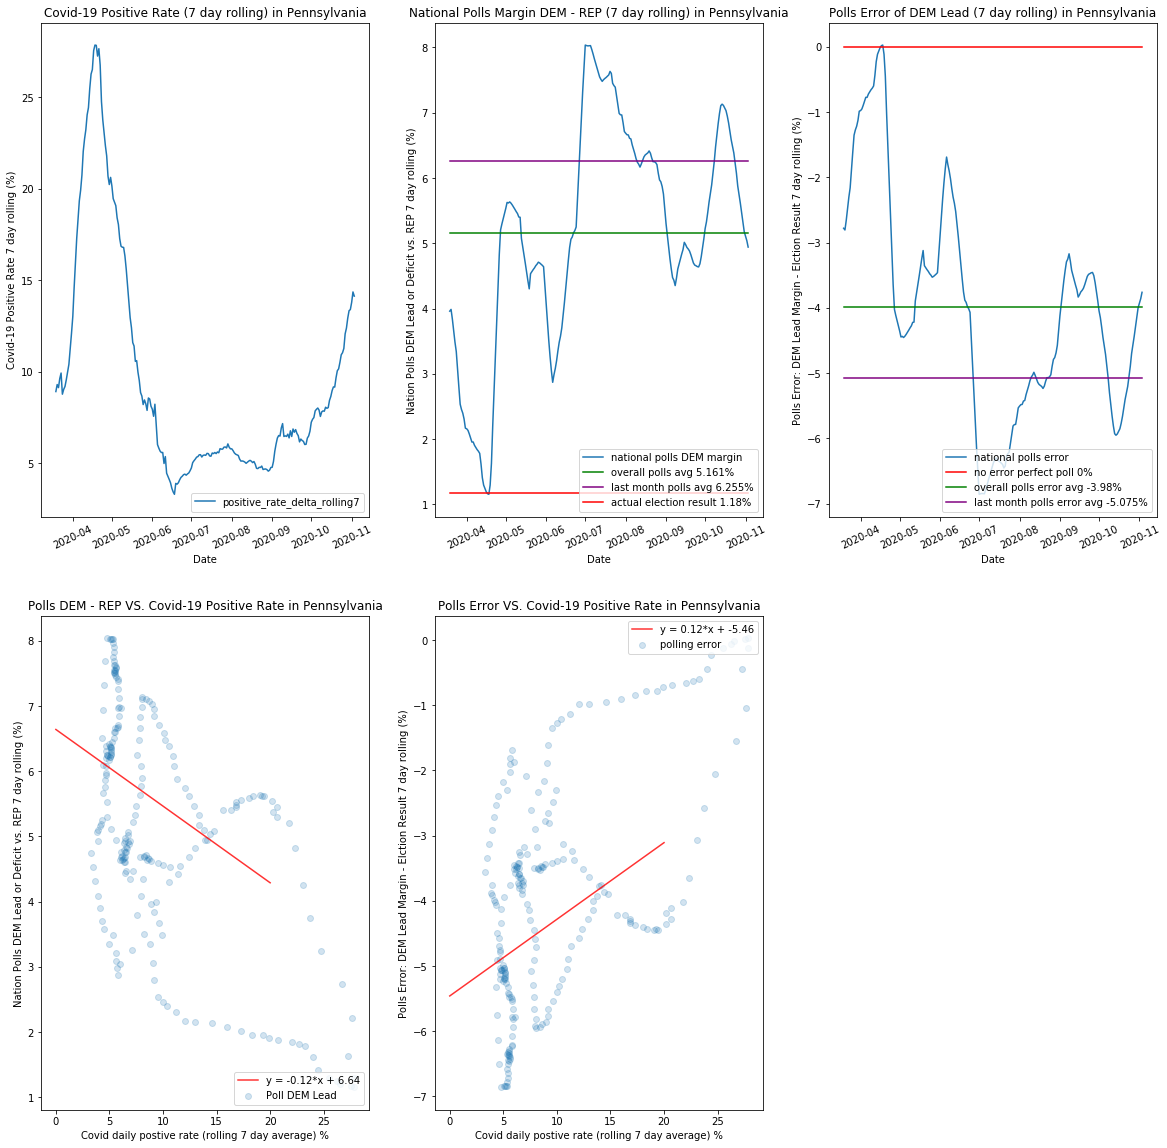

In [201]:
poll_cov(poll_covid, "Pennsylvania")



/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:764: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))



                               WLS Regression Results                              
Dep. Variable:     dem_lead_rolling_7_diff   R-squared:                       0.000
Model:                                 WLS   Adj. R-squared:                 -0.004
Method:                      Least Squares   F-statistic:                   0.08258
Date:                     Sat, 12 Dec 2020   Prob (F-statistic):              0.774
Time:                             15:30:54   Log-Likelihood:                   -inf
No. Observations:                      228   AIC:                               inf
Df Residuals:                          226   BIC:                               inf
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

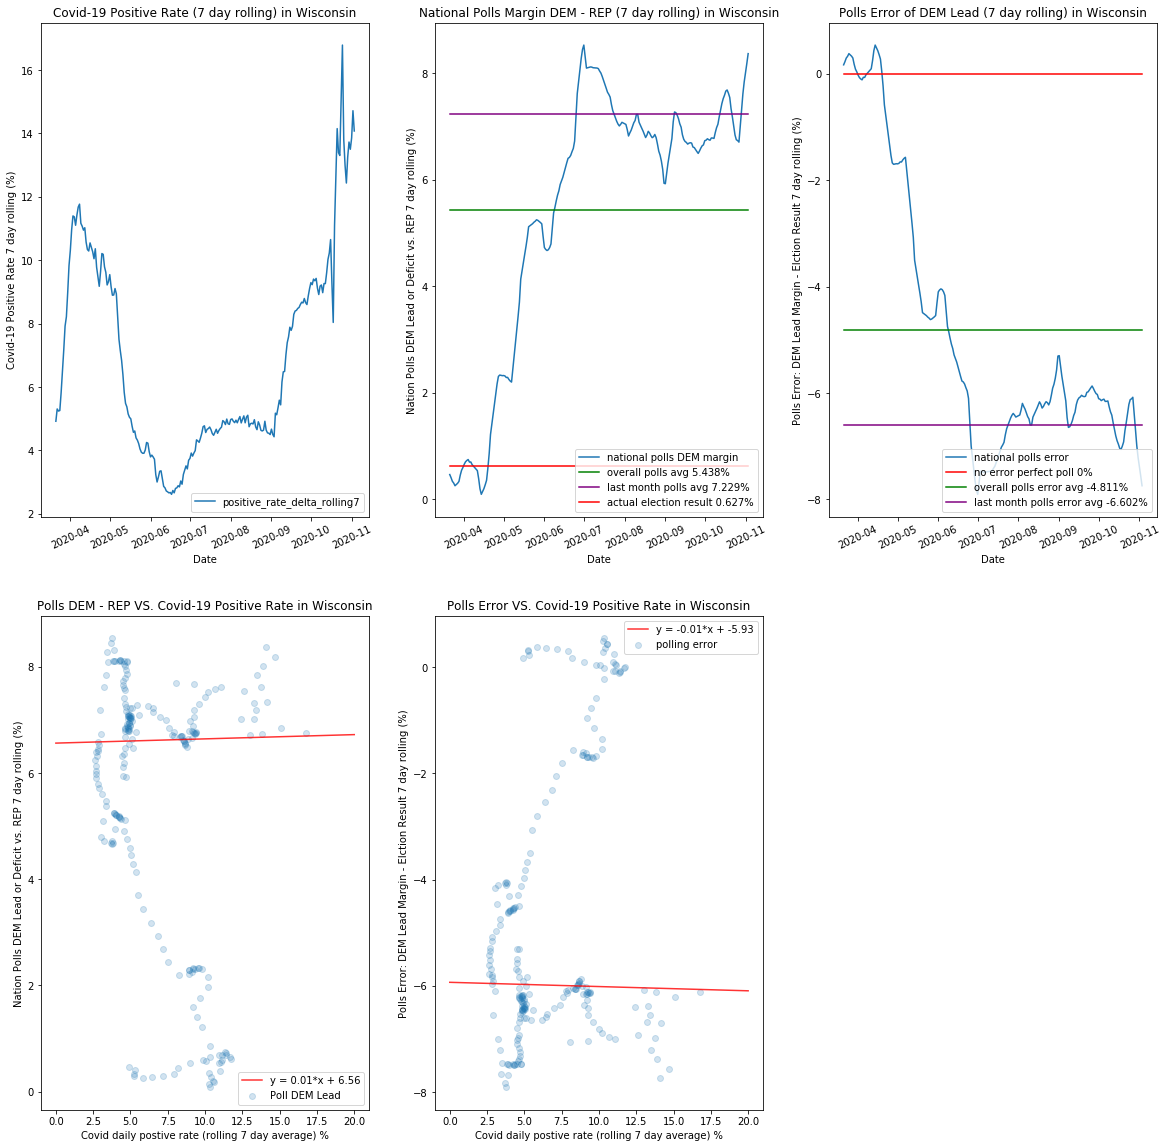

In [202]:
poll_cov(poll_covid, "Wisconsin")



In [145]:
poll_covid_election_day = poll_covid[poll_covid['date']=='2020-11-03']

In [147]:
poll_covid_election_day.head()

,state,date,rep_poll_2020,dem_poll_2020,dem_lead,dem_lead_rolling_7,usa_state_code,usa_state_latitude,usa_state_longitude,dem_lead_rolling_30,...,negative_delta,totalTestResults_delta,death_delta,positive_rate_delta,positive_negative_ratio_delta,positive_delta_rolling7,negative_delta_rolling7,totalTestResults_delta_rolling7,death_delta_rolling7,positive_rate_delta_rolling7
226,Alabama,2020-11-03,57.36126,37.82732,-19.53394,-19.027321,AL,32.318231,-86.902298,-18.194698,...,5986.0,6629.0,14.0,15.643385,17.323755,1356.000000,6139.142857,7166.000000,13.571429,18.922690
344,Alaska,2020-11-03,51.23236,43.57005,-7.66231,-7.500766,AK,63.588753,-154.493062,-5.668142,...,4202.0,4585.0,0.0,8.353326,9.114707,373.000000,6387.857143,6760.857143,2.000000,5.517052
579,Arizona,2020-11-03,46.10181,48.70539,2.60358,2.992987,AZ,34.048928,-111.093731,3.547420,...,9071.0,10633.0,38.0,15.790464,18.509536,1385.142857,9916.142857,11226.857143,18.428571,12.337761
726,Arkansas,2020-11-03,58.94886,36.17764,-22.77122,-23.458171,AR,35.201050,-91.831833,-18.147534,...,4936.0,5456.0,18.0,16.092375,17.787682,977.142857,8641.000000,9378.428571,20.857143,10.419047
962,California,2020-11-03,32.43615,61.62459,29.18844,28.638266,CA,36.778261,-119.417932,30.125426,...,158376.0,162420.0,14.0,2.489841,2.553417,4353.428571,131056.857143,135410.285714,40.857143,3.214991


In [233]:
covid_positive_election_day = poll_covid_election_day['positive_rate_delta_rolling7'].tolist()

poll_dem_margin = poll_covid_election_day['dem_lead_rolling_7'].tolist()

poll_error_election_day = poll_covid_election_day['dem_lead_rolling_7_diff'].tolist()

states_election_day = poll_covid_election_day['state_code'].tolist()

result_election_day = poll_covid_election_day['dem_2020_margin'].tolist()

# margin_shift = poll_covid_election_day['margin_shift'].tolist()


In [220]:
battleground_states = ['Florida', 'Georgia', 'Arizona', 
                       'Wisconsin', 'Pennsylvania', 'Nevada',
                       'Michigan', 'Minnesota', 'North Carolina',
                       'Texas', 'Ohio', 'Iowa'
                      ]

poll_covid_election_battleground = poll_covid_election_day.loc[poll_covid_election_day['state'].isin(battleground_states)]

poll_covid_election_battleground.head()


,state,date,rep_poll_2020,dem_poll_2020,dem_lead,dem_lead_rolling_7,usa_state_code,usa_state_latitude,usa_state_longitude,dem_lead_rolling_30,...,negative_delta,totalTestResults_delta,death_delta,positive_rate_delta,positive_negative_ratio_delta,positive_delta_rolling7,negative_delta_rolling7,totalTestResults_delta_rolling7,death_delta_rolling7,positive_rate_delta_rolling7
579,Arizona,2020-11-03,46.10181,48.70539,2.60358,2.992987,AZ,34.048928,-111.093731,3.547420,...,9071.0,10633.0,38.0,15.790464,18.509536,1385.142857,9916.142857,11226.857143,18.428571,12.337761
1903,Florida,2020-11-03,46.61909,49.08035,2.46126,2.151427,FL,27.664827,-81.515754,3.323476,...,20822.0,55696.0,56.0,8.174734,21.866295,4244.142857,29201.857143,68424.142857,55.714286,6.202698
2138,Georgia,2020-11-03,47.36694,48.54042,1.17348,1.386774,GA,32.157435,-82.907123,1.029727,...,20462.0,22130.0,480.0,7.537280,8.151696,1602.428571,18960.285714,20562.714286,90.714286,7.792884
2752,Iowa,2020-11-03,47.59527,46.31091,-1.28436,-0.553669,IA,41.878003,-93.097702,0.395159,...,1050.0,2142.0,22.0,50.980392,104.000000,1886.142857,2987.571429,4873.714286,14.571429,38.700317
4098,Michigan,2020-11-03,43.23326,51.15482,7.92156,8.275706,MI,44.314844,-85.602364,7.993318,...,38754.0,42191.0,45.0,8.146287,8.868762,3631.285714,47371.571429,51002.857143,25.142857,7.119769


In [221]:
covid_positive_election_day_battleground = poll_covid_election_battleground['positive_rate_delta_rolling7'].tolist()

poll_dem_margin_battleground = poll_covid_election_battleground['dem_lead_rolling_7'].tolist()

poll_error_election_day_battleground = poll_covid_election_battleground['dem_lead_rolling_7_diff'].tolist()

states_election_day_battleground = poll_covid_election_battleground['state_code'].tolist()

result_election_day_battleground = poll_covid_election_battleground['dem_2020_margin'].tolist()




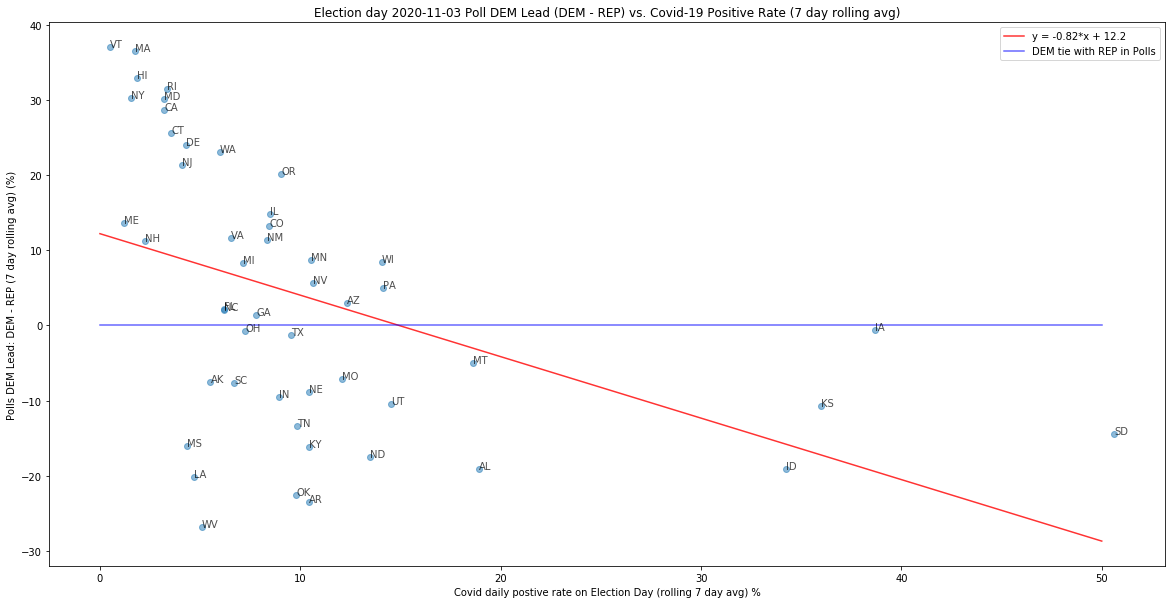

[12.20121706 -0.8172465 ]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     12.60
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           0.000888
Time:                        16:27:22   Log-Likelihood:                -204.44
No. Observations:                  49   AIC:                             412.9
Df Residuals:                      47   BIC:                             416.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.2012     

In [218]:

# plt.scatter(covid_positive_election_day, poll_dem_margin, alpha=0.5)

fig, ax = plt.subplots(figsize = (20,10))

ax.scatter(covid_positive_election_day, poll_dem_margin, alpha=0.5)

for i, txt in enumerate(states_election_day):
    ax.annotate(txt, (covid_positive_election_day[i], poll_dem_margin[i]), alpha =0.7)


results = sm.OLS(poll_dem_margin, sm.add_constant(covid_positive_election_day)).fit()

X_plot = np.linspace(0, 50, 501)
a = results.params[1]
b = results.params[0]
Y_plot = X_plot*a + b
Y_flat = [0]*len(X_plot)

plt.plot(X_plot, Y_plot, 'r-', label=f"y = {np.round(a,2)}*x + {np.round(b,2)}", alpha=0.8)
plt.plot(X_plot, Y_flat, 'b-', label="DEM tie with REP in Polls", alpha=0.6)


plt.legend(loc="upper right")
plt.xlabel("Covid daily postive rate on Election Day (rolling 7 day avg) %")
plt.ylabel("Polls DEM Lead: DEM - REP (7 day rolling avg) (%)")
plt.title("Election day 2020-11-03 Poll DEM Lead (DEM - REP) vs. Covid-19 Positive Rate (7 day rolling avg)")
    
plt.show()

print(results.params)
print(results.summary())


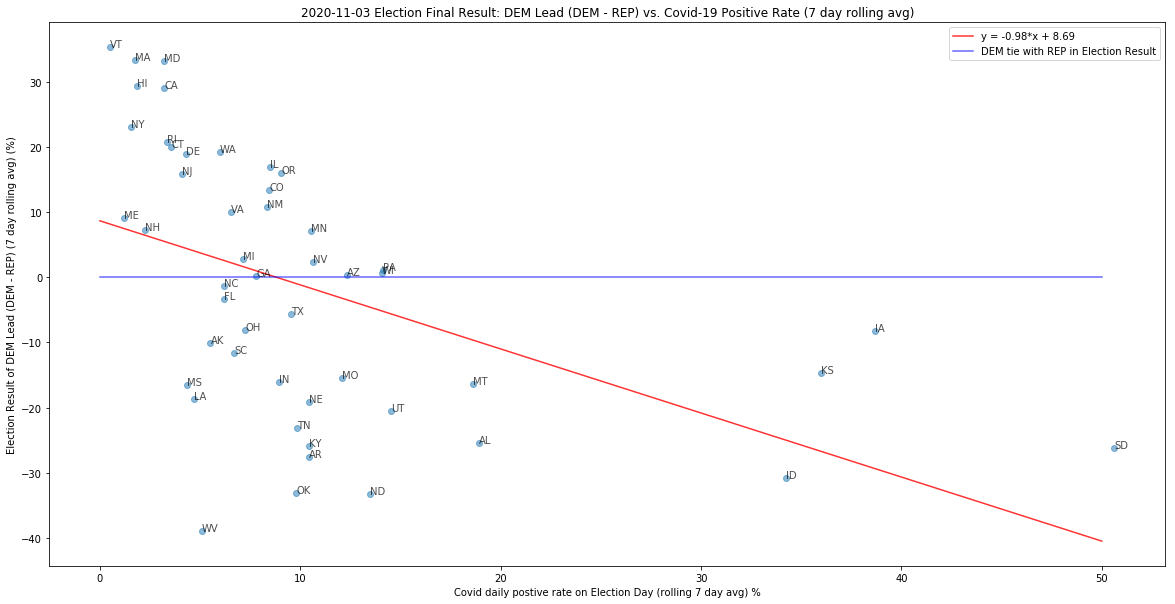

[ 8.69332029 -0.9842113 ]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     15.03
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           0.000328
Time:                        16:39:10   Log-Likelihood:                -209.23
No. Observations:                  49   AIC:                             422.5
Df Residuals:                      47   BIC:                             426.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6933     

In [223]:

# plt.scatter(covid_positive_election_day, dem_2020_margin, alpha=0.5)

# result_election_day

fig, ax = plt.subplots(figsize = (20,10))

ax.scatter(covid_positive_election_day, result_election_day, alpha=0.5)

for i, txt in enumerate(states_election_day):
    ax.annotate(txt, (covid_positive_election_day[i], result_election_day[i]), alpha =0.7)


results = sm.OLS(result_election_day, sm.add_constant(covid_positive_election_day)).fit()

X_plot = np.linspace(0, 50, 501)
a = results.params[1]
b = results.params[0]
Y_plot = X_plot*a + b
Y_flat = [0]*len(X_plot)

plt.plot(X_plot, Y_plot, 'r-', label=f"y = {np.round(a,2)}*x + {np.round(b,2)}", alpha=0.8)
plt.plot(X_plot, Y_flat, 'b-', label="DEM tie with REP in Election Result", alpha=0.6)


plt.legend(loc="upper right")
plt.xlabel("Covid daily postive rate on Election Day (rolling 7 day avg) %")
plt.ylabel("Election Result of DEM Lead (DEM - REP) (7 day rolling avg) (%)")
plt.title("2020-11-03 Election Final Result: DEM Lead (DEM - REP) vs. Covid-19 Positive Rate (7 day rolling avg)")
    
plt.show()

print(results.params)
print(results.summary())



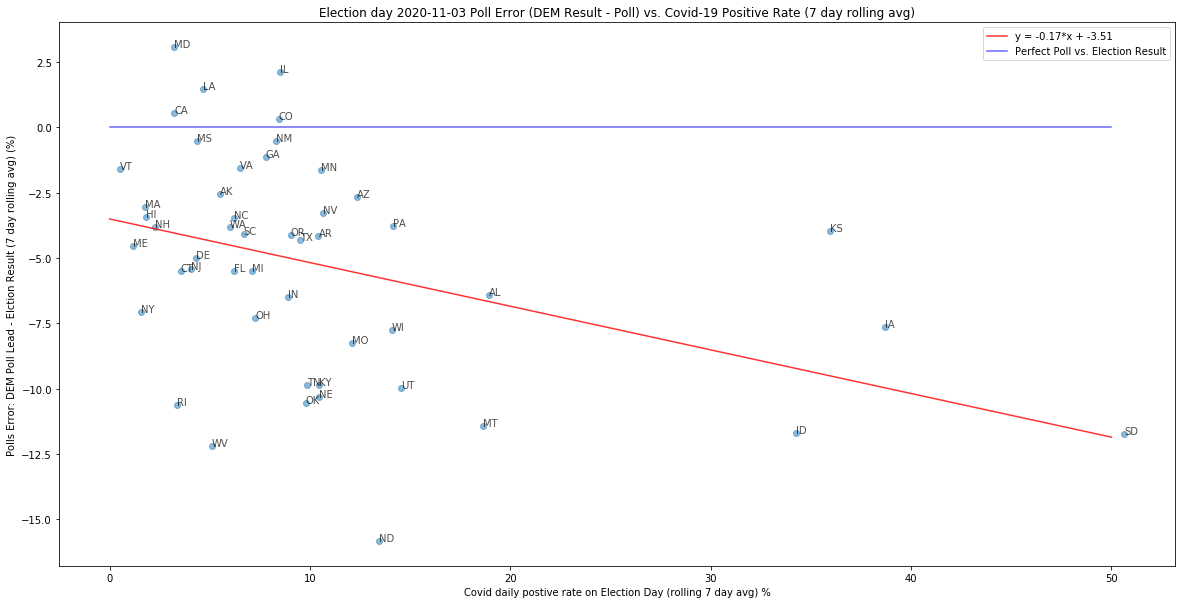

[-3.50789677 -0.1669648 ]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     9.021
Date:                Sat, 12 Dec 2020   Prob (F-statistic):            0.00427
Time:                        16:24:38   Log-Likelihood:                -134.80
No. Observations:                  49   AIC:                             273.6
Df Residuals:                      47   BIC:                             277.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5079     

In [214]:
fig, ax = plt.subplots(figsize = (20,10))

ax.scatter(covid_positive_election_day, poll_error_election_day, alpha=0.5)

for i, txt in enumerate(states_election_day):
    ax.annotate(txt, (covid_positive_election_day[i], poll_error_election_day[i]), alpha =0.7)


results2 = sm.OLS(poll_error_election_day, sm.add_constant(covid_positive_election_day)).fit()

X_plot = np.linspace(0, 50, 501)
a2 = results2.params[1]
b2 = results2.params[0]
Y_plot = X_plot*a2 + b2
Y_flat = [0]*len(X_plot)

plt.plot(X_plot, Y_plot, 'r-', label=f"y = {np.round(a2,2)}*x + {np.round(b2,2)}", alpha=0.8)
plt.plot(X_plot, Y_flat, 'b-', label="Perfect Poll on Election Result", alpha=0.6)


plt.legend(loc="upper right")
plt.xlabel("Covid daily postive rate on Election Day (rolling 7 day avg) %")
plt.ylabel("Polls Error: DEM Poll Lead - Elction Result (7 day rolling avg) (%)")
plt.title("Election day 2020-11-03 Poll Error (DEM Result - Poll) vs. Covid-19 Positive Rate (7 day rolling avg)")
    
plt.show()

print(results2.params)
print(results2.summary())

In [224]:
covid_positive_election_day_battleground = poll_covid_election_battleground['positive_rate_delta_rolling7'].tolist()

poll_dem_margin_battleground = poll_covid_election_battleground['dem_lead_rolling_7'].tolist()

poll_error_election_day_battleground = poll_covid_election_battleground['dem_lead_rolling_7_diff'].tolist()

states_election_day_battleground = poll_covid_election_battleground['state_code'].tolist()

result_election_day_battleground = poll_covid_election_battleground['dem_2020_margin'].tolist()


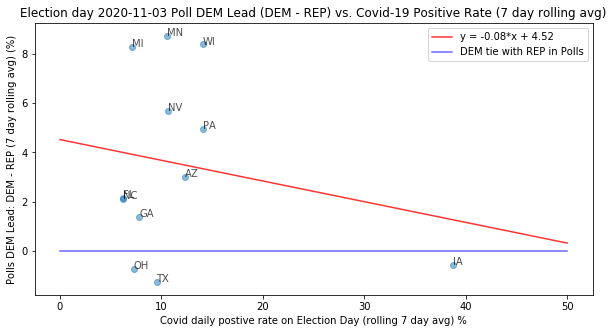

[ 4.51640353 -0.08388989]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                 -0.054
Method:                 Least Squares   F-statistic:                    0.4334
Date:                Sat, 12 Dec 2020   Prob (F-statistic):              0.525
Time:                        17:19:55   Log-Likelihood:                -31.776
No. Observations:                  12   AIC:                             67.55
Df Residuals:                      10   BIC:                             68.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5164     

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [229]:
# plt.scatter(covid_positive_election_day_battleground, poll_dem_margin_battleground, alpha=0.5)

fig, ax = plt.subplots(figsize = (10,5))

ax.scatter(covid_positive_election_day_battleground, poll_dem_margin_battleground, alpha=0.5)

for i, txt in enumerate(states_election_day_battleground):
    ax.annotate(txt, (covid_positive_election_day_battleground[i], poll_dem_margin_battleground[i]), alpha =0.7)


results = sm.OLS(poll_dem_margin_battleground, sm.add_constant(covid_positive_election_day_battleground)).fit()

X_plot = np.linspace(0, 50, 501)
a = results.params[1]
b = results.params[0]
Y_plot = X_plot*a + b
Y_flat = [0]*len(X_plot)

plt.plot(X_plot, Y_plot, 'r-', label=f"y = {np.round(a,2)}*x + {np.round(b,2)}", alpha=0.8)
plt.plot(X_plot, Y_flat, 'b-', label="DEM tie with REP in Polls", alpha=0.6)


plt.legend(loc="upper right")
plt.xlabel("Covid daily postive rate on Election Day (rolling 7 day avg) %")
plt.ylabel("Polls DEM Lead: DEM - REP (7 day rolling avg) (%)")
plt.title("Election day 2020-11-03 Poll DEM Lead (DEM - REP) vs. Covid-19 Positive Rate (7 day rolling avg)")
    
plt.show()

print(results.params)
print(results.summary())



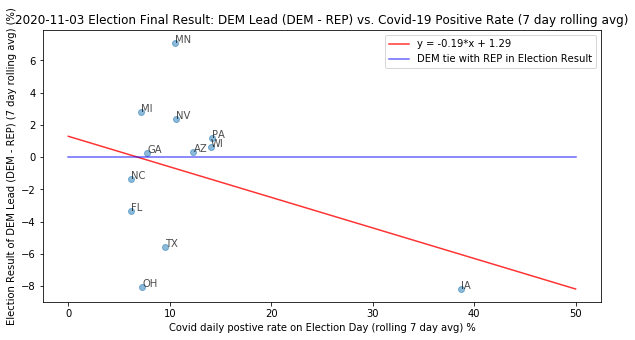

[ 1.2931866  -0.18947101]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     1.556
Date:                Sat, 12 Dec 2020   Prob (F-statistic):              0.241
Time:                        17:20:04   Log-Likelihood:                -33.883
No. Observations:                  12   AIC:                             71.77
Df Residuals:                      10   BIC:                             72.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2932     

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [230]:

# plt.scatter(covid_positive_election_day_battleground, result_election_day_battleground, alpha=0.5)

# result_election_day

fig, ax = plt.subplots(figsize = (10,5))

ax.scatter(covid_positive_election_day_battleground, result_election_day_battleground, alpha=0.5)

for i, txt in enumerate(states_election_day_battleground):
    ax.annotate(txt, (covid_positive_election_day_battleground[i], result_election_day_battleground[i]), alpha =0.7)


results = sm.OLS(result_election_day_battleground, sm.add_constant(covid_positive_election_day_battleground)).fit()

X_plot = np.linspace(0, 50, 501)
a = results.params[1]
b = results.params[0]
Y_plot = X_plot*a + b
Y_flat = [0]*len(X_plot)

plt.plot(X_plot, Y_plot, 'r-', label=f"y = {np.round(a,2)}*x + {np.round(b,2)}", alpha=0.8)
plt.plot(X_plot, Y_flat, 'b-', label="DEM tie with REP in Election Result", alpha=0.6)


plt.legend(loc="upper right")
plt.xlabel("Covid daily postive rate on Election Day (rolling 7 day avg) %")
plt.ylabel("Election Result of DEM Lead (DEM - REP) (7 day rolling avg) (%)")
plt.title("2020-11-03 Election Final Result: DEM Lead (DEM - REP) vs. Covid-19 Positive Rate (7 day rolling avg)")
    
plt.show()

print(results.params)
print(results.summary())




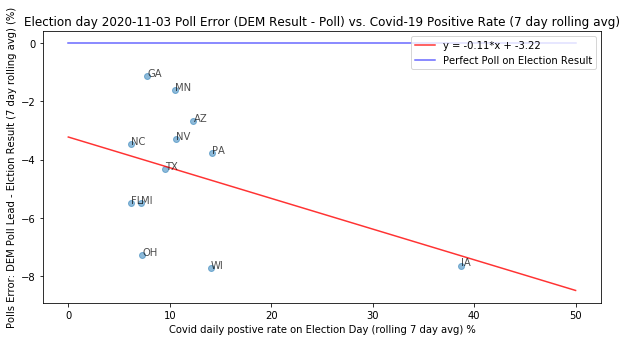

[-3.22321693 -0.10558112]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     2.062
Date:                Sat, 12 Dec 2020   Prob (F-statistic):              0.182
Time:                        17:20:12   Log-Likelihood:                -25.178
No. Observations:                  12   AIC:                             54.36
Df Residuals:                      10   BIC:                             55.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2232     

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [231]:
fig, ax = plt.subplots(figsize = (10,5))

ax.scatter(covid_positive_election_day_battleground, poll_error_election_day_battleground, alpha=0.5)

for i, txt in enumerate(states_election_day_battleground):
    ax.annotate(txt, (covid_positive_election_day_battleground[i], poll_error_election_day_battleground[i]), alpha =0.7)


results2 = sm.OLS(poll_error_election_day_battleground, sm.add_constant(covid_positive_election_day_battleground)).fit()

X_plot = np.linspace(0, 50, 501)
a2 = results2.params[1]
b2 = results2.params[0]
Y_plot = X_plot*a2 + b2
Y_flat = [0]*len(X_plot)

plt.plot(X_plot, Y_plot, 'r-', label=f"y = {np.round(a2,2)}*x + {np.round(b2,2)}", alpha=0.8)
plt.plot(X_plot, Y_flat, 'b-', label="Perfect Poll on Election Result", alpha=0.6)


plt.legend(loc="upper right")
plt.xlabel("Covid daily postive rate on Election Day (rolling 7 day avg) %")
plt.ylabel("Polls Error: DEM Poll Lead - Elction Result (7 day rolling avg) (%)")
plt.title("Election day 2020-11-03 Poll Error (DEM Result - Poll) vs. Covid-19 Positive Rate (7 day rolling avg)")
    
plt.show()

print(results2.params)
print(results2.summary())

In [789]:
demographic_tigeryi.head()

,county,state_code,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,total_votes20,...,state,cases,deaths,dem_16_margin,dem_20_margin,dem_margin_shift,cases_rate,deaths_rate,men_percent,women_percent
0,Abbeville,SC,62.868333,34.613950,10724.0,6742.0,3712.0,66.074157,32.984799,12433.0,...,South Carolina,808.0,18.0,-28.254383,-33.089359,-4.834976,3.259642,0.072616,48.588026,51.411974
1,Acadia,LA,77.262105,20.587161,27386.0,21159.0,5638.0,79.493404,19.148637,28425.0,...,Louisiana,3291.0,103.0,-56.674943,-60.344767,-3.669824,5.256601,0.164518,48.609580,51.390420
2,Accomack,VA,54.471596,42.761028,15755.0,8582.0,6737.0,54.150431,44.739639,16938.0,...,Virginia,1229.0,19.0,-11.710568,-9.410792,2.299776,3.742387,0.057856,48.961632,51.038368
3,Ada,ID,47.931611,38.691733,195587.0,93748.0,75676.0,50.387256,46.470359,259389.0,...,Idaho,17828.0,184.0,-9.239878,-3.916897,5.322981,4.097289,0.042287,50.101237,49.898763
4,Adair,IA,65.336526,29.981378,3759.0,2456.0,1127.0,69.734640,28.615826,4183.0,...,Iowa,250.0,1.0,-35.355148,-41.118814,-5.763667,3.476085,0.013904,49.388209,50.611791


In [238]:

scaler = MinMaxScaler()


In [796]:
vars_to_merge = [x for x in demographic_tigeryi.columns if x not in ['state', 'county','state_code']]

df = pd.DataFrame(demographic_tigeryi.groupby(['state', 'county'])[vars_to_merge].sum())

df.head(5)

percentage16_Donald_Trump  percentage16_Hillary_Clinton  \
state   county                                                             
Alabama Autauga                  73.435789                     23.956855   
        Baldwin                  77.351472                     19.565310   
        Barbour                  52.271415                     46.660250   
        Bibb                     76.966164                     21.422039   
        Blount                   89.851875                      8.469902   

                 total_votes16  votes16_Donald_Trump  votes16_Hillary_Clinton  \
state   county                                                                  
Alabama Autauga        24661.0               18110.0                   5908.0   
        Baldwin        94090.0               72780.0                  18409.0   
        Barbour        10390.0                5431.0                   4848.0   
        Bibb            8748.0                6733.0                   1874.0   
        Blount         25384.0               22808.0                   2150.0   

                 percentage20_Donald_Trump  percentage20_Joe_Biden  \
state   county                                                       
Alabama Autauga                  71.507652               26.954666   
        Baldwin                  76.235715               22.345220   
        Barbour                  53.600459               45.634503   
        Bibb                     78.428915               20.704064   
        Blount                   89.569904                9.566991   

                 total_votes20  votes20_Donald_Trump  votes20_Joe_Biden  ...  \
state   county                                                           ...   
Alabama Autauga        27639.0               19764.0             7450.0  ...   
        Baldwin       108945.0               83055.0            24344.0  ...   
        Barbour        10457.0                5605.0             4772.0  ...   
        Bibb            9573.0                7508.0             1982.0  ...   
        Blount         27459.0               24595.0             2627.0  ...   

                 Unemployment   cases  deaths  dem_16_margin  dem_20_margin  \
state   county                                                                
Alabama Autauga           5.2  2210.0    31.0     -49.478934     -44.552987   
        Baldwin           5.5  7054.0    74.0     -57.786162     -53.890495   
        Barbour          12.4  1077.0     9.0      -5.611165      -7.965956   
        Bibb              8.2   900.0    15.0     -55.544124     -57.724851   
        Blount            4.9  2204.0    25.0     -81.381973     -80.002913   

                 dem_margin_shift  cases_rate  deaths_rate  men_percent  \
state   county                                                            
Alabama Autauga          4.925948    4.015553     0.056327    48.875282   
        Baldwin          3.895667    3.468725     0.036389    48.941286   
        Barbour         -2.354791    4.110530     0.034350    53.341476   
        Bibb            -2.180727    3.985828     0.066430    54.255979   
        Blount           1.379059    3.821943     0.043352    49.404339   

                 women_percent  
state   county                  
Alabama Autauga      51.124718  
        Baldwin      51.058714  
        Barbour      46.658524  
        Bibb         45.744021  
        Blount       50.595661  

[5 rows x 55 columns]

In [797]:
df = df.drop(['dem_16_margin', 'dem_20_margin', 'dem_margin_shift'], axis=1)
df.head()

percentage16_Donald_Trump  percentage16_Hillary_Clinton  \
state   county                                                             
Alabama Autauga                  73.435789                     23.956855   
        Baldwin                  77.351472                     19.565310   
        Barbour                  52.271415                     46.660250   
        Bibb                     76.966164                     21.422039   
        Blount                   89.851875                      8.469902   

                 total_votes16  votes16_Donald_Trump  votes16_Hillary_Clinton  \
state   county                                                                  
Alabama Autauga        24661.0               18110.0                   5908.0   
        Baldwin        94090.0               72780.0                  18409.0   
        Barbour        10390.0                5431.0                   4848.0   
        Bibb            8748.0                6733.0                   1874.0   
        Blount         25384.0               22808.0                   2150.0   

                 percentage20_Donald_Trump  percentage20_Joe_Biden  \
state   county                                                       
Alabama Autauga                  71.507652               26.954666   
        Baldwin                  76.235715               22.345220   
        Barbour                  53.600459               45.634503   
        Bibb                     78.428915               20.704064   
        Blount                   89.569904                9.566991   

                 total_votes20  votes20_Donald_Trump  votes20_Joe_Biden  ...  \
state   county                                                           ...   
Alabama Autauga        27639.0               19764.0             7450.0  ...   
        Baldwin       108945.0               83055.0            24344.0  ...   
        Barbour        10457.0                5605.0             4772.0  ...   
        Bibb            9573.0                7508.0             1982.0  ...   
        Blount         27459.0               24595.0             2627.0  ...   

                 PublicWork  SelfEmployed  FamilyWork  Unemployment   cases  \
state   county                                                                
Alabama Autauga        20.2           5.6         0.1           5.2  2210.0   
        Baldwin        12.9           6.3         0.1           5.5  7054.0   
        Barbour        19.1           6.5         0.3          12.4  1077.0   
        Bibb           17.4           6.3         0.3           8.2   900.0   
        Blount         11.9           4.0         0.1           4.9  2204.0   

                 deaths  cases_rate  deaths_rate  men_percent  women_percent  
state   county                                                                
Alabama Autauga    31.0    4.015553     0.056327    48.875282      51.124718  
        Baldwin    74.0    3.468725     0.036389    48.941286      51.058714  
        Barbour     9.0    4.110530     0.034350    53.341476      46.658524  
        Bibb       15.0    3.985828     0.066430    54.255979      45.744021  
        Blount     25.0    3.821943     0.043352    49.404339      50.595661  

[5 rows x 52 columns]

In [798]:
df = df.drop(['lat', 'long'], axis=1)

df.head()

percentage16_Donald_Trump  percentage16_Hillary_Clinton  \
state   county                                                             
Alabama Autauga                  73.435789                     23.956855   
        Baldwin                  77.351472                     19.565310   
        Barbour                  52.271415                     46.660250   
        Bibb                     76.966164                     21.422039   
        Blount                   89.851875                      8.469902   

                 total_votes16  votes16_Donald_Trump  votes16_Hillary_Clinton  \
state   county                                                                  
Alabama Autauga        24661.0               18110.0                   5908.0   
        Baldwin        94090.0               72780.0                  18409.0   
        Barbour        10390.0                5431.0                   4848.0   
        Bibb            8748.0                6733.0                   1874.0   
        Blount         25384.0               22808.0                   2150.0   

                 percentage20_Donald_Trump  percentage20_Joe_Biden  \
state   county                                                       
Alabama Autauga                  71.507652               26.954666   
        Baldwin                  76.235715               22.345220   
        Barbour                  53.600459               45.634503   
        Bibb                     78.428915               20.704064   
        Blount                   89.569904                9.566991   

                 total_votes20  votes20_Donald_Trump  votes20_Joe_Biden  ...  \
state   county                                                           ...   
Alabama Autauga        27639.0               19764.0             7450.0  ...   
        Baldwin       108945.0               83055.0            24344.0  ...   
        Barbour        10457.0                5605.0             4772.0  ...   
        Bibb            9573.0                7508.0             1982.0  ...   
        Blount         27459.0               24595.0             2627.0  ...   

                 PublicWork  SelfEmployed  FamilyWork  Unemployment   cases  \
state   county                                                                
Alabama Autauga        20.2           5.6         0.1           5.2  2210.0   
        Baldwin        12.9           6.3         0.1           5.5  7054.0   
        Barbour        19.1           6.5         0.3          12.4  1077.0   
        Bibb           17.4           6.3         0.3           8.2   900.0   
        Blount         11.9           4.0         0.1           4.9  2204.0   

                 deaths  cases_rate  deaths_rate  men_percent  women_percent  
state   county                                                                
Alabama Autauga    31.0    4.015553     0.056327    48.875282      51.124718  
        Baldwin    74.0    3.468725     0.036389    48.941286      51.058714  
        Barbour     9.0    4.110530     0.034350    53.341476      46.658524  
        Bibb       15.0    3.985828     0.066430    54.255979      45.744021  
        Blount     25.0    3.821943     0.043352    49.404339      50.595661  

[5 rows x 50 columns]

In [799]:
df = df.drop(["Men", "Women", "VotingAgeCitizen", "Employed",
 "Income","IncomeErr","IncomePerCap", "IncomePerCapErr",
 "cases", "deaths", "TotalPop", "VotingAgeCitizen", "Employed"], axis=1)
df.head()

percentage16_Donald_Trump  percentage16_Hillary_Clinton  \
state   county                                                             
Alabama Autauga                  73.435789                     23.956855   
        Baldwin                  77.351472                     19.565310   
        Barbour                  52.271415                     46.660250   
        Bibb                     76.966164                     21.422039   
        Blount                   89.851875                      8.469902   

                 total_votes16  votes16_Donald_Trump  votes16_Hillary_Clinton  \
state   county                                                                  
Alabama Autauga        24661.0               18110.0                   5908.0   
        Baldwin        94090.0               72780.0                  18409.0   
        Barbour        10390.0                5431.0                   4848.0   
        Bibb            8748.0                6733.0                   1874.0   
        Blount         25384.0               22808.0                   2150.0   

                 percentage20_Donald_Trump  percentage20_Joe_Biden  \
state   county                                                       
Alabama Autauga                  71.507652               26.954666   
        Baldwin                  76.235715               22.345220   
        Barbour                  53.600459               45.634503   
        Bibb                     78.428915               20.704064   
        Blount                   89.569904                9.566991   

                 total_votes20  votes20_Donald_Trump  votes20_Joe_Biden  ...  \
state   county                                                           ...   
Alabama Autauga        27639.0               19764.0             7450.0  ...   
        Baldwin       108945.0               83055.0            24344.0  ...   
        Barbour        10457.0                5605.0             4772.0  ...   
        Bibb            9573.0                7508.0             1982.0  ...   
        Blount         27459.0               24595.0             2627.0  ...   

                 MeanCommute  PrivateWork  PublicWork  SelfEmployed  \
state   county                                                        
Alabama Autauga         25.8         74.1        20.2           5.6   
        Baldwin         27.0         80.7        12.9           6.3   
        Barbour         23.4         74.1        19.1           6.5   
        Bibb            30.0         76.0        17.4           6.3   
        Blount          35.0         83.9        11.9           4.0   

                 FamilyWork  Unemployment  cases_rate  deaths_rate  \
state   county                                                       
Alabama Autauga         0.1           5.2    4.015553     0.056327   
        Baldwin         0.1           5.5    3.468725     0.036389   
        Barbour         0.3          12.4    4.110530     0.034350   
        Bibb            0.3           8.2    3.985828     0.066430   
        Blount          0.1           4.9    3.821943     0.043352   

                 men_percent  women_percent  
state   county                               
Alabama Autauga    48.875282      51.124718  
        Baldwin    48.941286      51.058714  
        Barbour    53.341476      46.658524  
        Bibb       54.255979      45.744021  
        Blount     49.404339      50.595661  

[5 rows x 39 columns]

In [800]:
df.to_csv("df_tigeryi.csv", index=False)

In [605]:
# df = pd.read_csv("df_tigeryi.csv", index_col=False)

In [801]:
df.head()

percentage16_Donald_Trump  percentage16_Hillary_Clinton  \
state   county                                                             
Alabama Autauga                  73.435789                     23.956855   
        Baldwin                  77.351472                     19.565310   
        Barbour                  52.271415                     46.660250   
        Bibb                     76.966164                     21.422039   
        Blount                   89.851875                      8.469902   

                 total_votes16  votes16_Donald_Trump  votes16_Hillary_Clinton  \
state   county                                                                  
Alabama Autauga        24661.0               18110.0                   5908.0   
        Baldwin        94090.0               72780.0                  18409.0   
        Barbour        10390.0                5431.0                   4848.0   
        Bibb            8748.0                6733.0                   1874.0   
        Blount         25384.0               22808.0                   2150.0   

                 percentage20_Donald_Trump  percentage20_Joe_Biden  \
state   county                                                       
Alabama Autauga                  71.507652               26.954666   
        Baldwin                  76.235715               22.345220   
        Barbour                  53.600459               45.634503   
        Bibb                     78.428915               20.704064   
        Blount                   89.569904                9.566991   

                 total_votes20  votes20_Donald_Trump  votes20_Joe_Biden  ...  \
state   county                                                           ...   
Alabama Autauga        27639.0               19764.0             7450.0  ...   
        Baldwin       108945.0               83055.0            24344.0  ...   
        Barbour        10457.0                5605.0             4772.0  ...   
        Bibb            9573.0                7508.0             1982.0  ...   
        Blount         27459.0               24595.0             2627.0  ...   

                 MeanCommute  PrivateWork  PublicWork  SelfEmployed  \
state   county                                                        
Alabama Autauga         25.8         74.1        20.2           5.6   
        Baldwin         27.0         80.7        12.9           6.3   
        Barbour         23.4         74.1        19.1           6.5   
        Bibb            30.0         76.0        17.4           6.3   
        Blount          35.0         83.9        11.9           4.0   

                 FamilyWork  Unemployment  cases_rate  deaths_rate  \
state   county                                                       
Alabama Autauga         0.1           5.2    4.015553     0.056327   
        Baldwin         0.1           5.5    3.468725     0.036389   
        Barbour         0.3          12.4    4.110530     0.034350   
        Bibb            0.3           8.2    3.985828     0.066430   
        Blount          0.1           4.9    3.821943     0.043352   

                 men_percent  women_percent  
state   county                               
Alabama Autauga    48.875282      51.124718  
        Baldwin    48.941286      51.058714  
        Barbour    53.341476      46.658524  
        Bibb       54.255979      45.744021  
        Blount     49.404339      50.595661  

[5 rows x 39 columns]

In [802]:
# min max scaling
df_final = minmax_scaling(df, columns=df.columns)
df_final.head()

percentage16_Donald_Trump  percentage16_Hillary_Clinton  \
state   county                                                             
Alabama Autauga                   0.748799                      0.241484   
        Baldwin                   0.793843                      0.190529   
        Barbour                   0.505335                      0.504911   
        Bibb                      0.789411                      0.212072   
        Blount                    0.937641                      0.061789   

                 total_votes16  votes16_Donald_Trump  votes16_Hillary_Clinton  \
state   county                                                                  
Alabama Autauga       0.010629              0.030577                 0.003568   
        Baldwin       0.040630              0.123174                 0.011123   
        Barbour       0.004462              0.009102                 0.002928   
        Bibb          0.003752              0.011307                 0.001130   
        Blount        0.010941              0.038534                 0.001297   

                 percentage20_Donald_Trump  percentage20_Joe_Biden  \
state   county                                                       
Alabama Autauga                   0.717614                0.275705   
        Baldwin                   0.771725                0.222451   
        Barbour                   0.512673                0.491519   
        Bibb                      0.796825                0.203490   
        Blount                    0.924329                0.074820   

                 total_votes20  votes20_Donald_Trump  votes20_Joe_Biden  ...  \
state   county                                                           ...   
Alabama Autauga       0.006660              0.017799           0.002526  ...   
        Baldwin       0.026300              0.074971           0.008258  ...   
        Barbour       0.002510              0.005009           0.001618  ...   
        Bibb          0.002296              0.006728           0.000671  ...   
        Blount        0.006617              0.022163           0.000890  ...   

                 MeanCommute  PrivateWork  PublicWork  SelfEmployed  \
state   county                                                        
Alabama Autauga     0.483957     0.740741    0.293135      0.147368   
        Baldwin     0.516043     0.857143    0.157699      0.165789   
        Barbour     0.419786     0.740741    0.272727      0.171053   
        Bibb        0.596257     0.774250    0.241187      0.165789   
        Blount      0.729947     0.913580    0.139147      0.105263   

                 FamilyWork  Unemployment  cases_rate  deaths_rate  \
state   county                                                       
Alabama Autauga      0.0125      0.181185    0.194740     0.088130   
        Baldwin      0.0125      0.191638    0.168221     0.056934   
        Barbour      0.0375      0.432056    0.199346     0.053744   
        Bibb         0.0375      0.285714    0.193298     0.103938   
        Blount       0.0125      0.170732    0.185351     0.067830   

                 men_percent  women_percent  
state   county                               
Alabama Autauga     0.147038       0.852962  
        Baldwin     0.148800       0.851200  
        Barbour     0.266240       0.733760  
        Bibb        0.290647       0.709353  
        Blount      0.161159       0.838841  

[5 rows x 39 columns]

In [803]:
votes_perc = df[['percentage20_Donald_Trump', 'percentage20_Joe_Biden', 
                 'votes20_Donald_Trump', 'votes20_Joe_Biden']].columns


In [804]:
PearsonCorr = df_final.corr(method="pearson")

In [805]:
Pearson = PearsonCorr[votes_perc]

In [806]:
SpearmanCorr = df_final.corr(method="spearman")

In [807]:
Spear = SpearmanCorr[votes_perc]

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


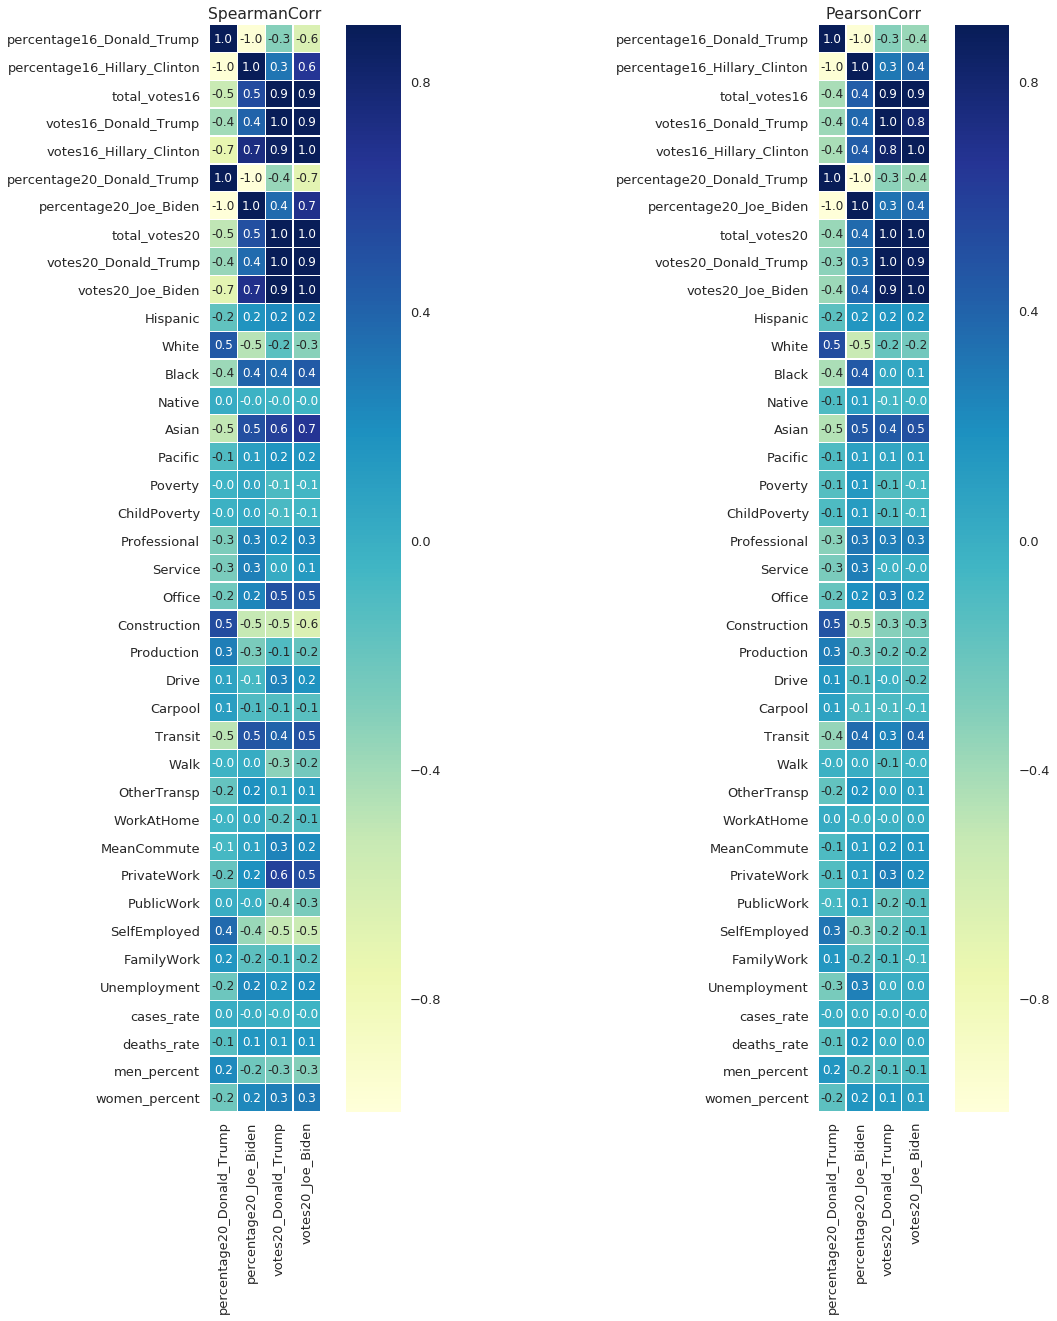

In [808]:
# Correlation Diagram

plt.subplots(figsize = (20,20))
    
plt.subplot(1,2,1)

plt.title("SpearmanCorr")

ax1 = sns.heatmap(Spear, vmax=.9, square=True, annot=True, linewidths=.3, cmap="YlGnBu", fmt='.1f') 

plt.subplot(1,2,2)

plt.title("PearsonCorr")

ax2 = sns.heatmap(Pearson, vmax=.9, square=True, annot=True, linewidths=.3, cmap="YlGnBu", fmt='.1f') 

plt.show()


In [809]:
votes = df_final.iloc[:,0:10].columns
votes

Index(['percentage16_Donald_Trump', 'percentage16_Hillary_Clinton',
       'total_votes16', 'votes16_Donald_Trump', 'votes16_Hillary_Clinton',
       'percentage20_Donald_Trump', 'percentage20_Joe_Biden', 'total_votes20',
       'votes20_Donald_Trump', 'votes20_Joe_Biden'],
      dtype='object')

In [810]:
factors =  [x for x in df.columns if x not in votes]



/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,24.0833,'n_components')

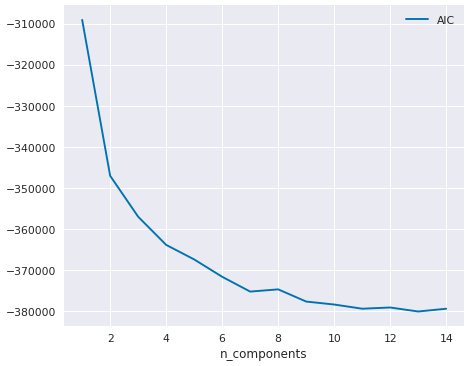

In [811]:
# GM clustering

X = df_final[factors].values

GM_n_components = np.arange(1, 15)
GM_models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in GM_n_components]

plt.figure(num=None, figsize=(8, 6), dpi=60, facecolor='w', edgecolor='r')
plt.plot(GM_n_components, [m.aic(X) for m in GM_models], label='AIC')
plt.tight_layout()
plt.legend(loc='best')
plt.xlabel('n_components')

In [812]:
# GM clustering - Gaussian Mixture Model

GM_n_classes = 2

GMcluster = GaussianMixture(n_components=GM_n_classes, covariance_type='full',random_state = 0)

GMcluster_fit = GMcluster.fit(df_final)

GMlabels = GMcluster_fit.predict(df_final)

print('Number of clusters: ' + format(len(np.unique(GMlabels))))


Number of clusters: 2


In [813]:
unique, counts = np.unique(GMlabels, return_counts=True)
dict(zip(unique, counts))

{0: 652, 1: 2303}

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


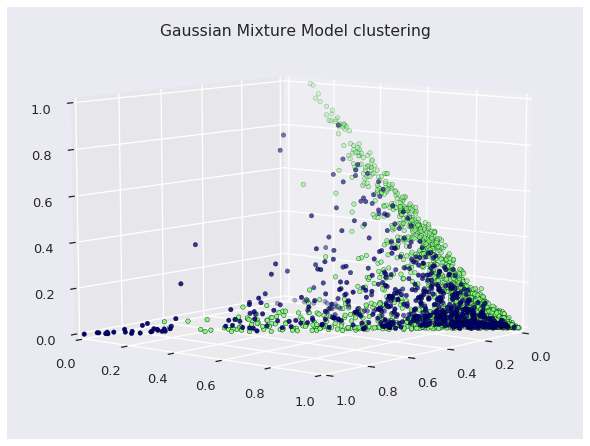

In [822]:
# GM clustering - Gaussian Mixture Model

fig = plt.figure(figsize=(8, 6),facecolor='w', edgecolor='r')
ax = Axes3D(fig, rect = (1, 1, 1, 1))
ax.set_xlim3d(0, 1)
ax.set_ylim3d(0, 1)
ax.set_zlim3d(0, 1)
ax.view_init(10, 40)
for l in np.unique(GMlabels):
    ax.scatter(X[GMlabels == l, 0], X[GMlabels == l, 1], X[GMlabels == l, 2],
               color=plt.cm.jet(float(l) / np.max(GMlabels + 1)),s=20, edgecolor='k')
plt.title('Gaussian Mixture Model clustering' )

plt.show()

In [823]:
df_final['Party_Cluster'] = GMlabels

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


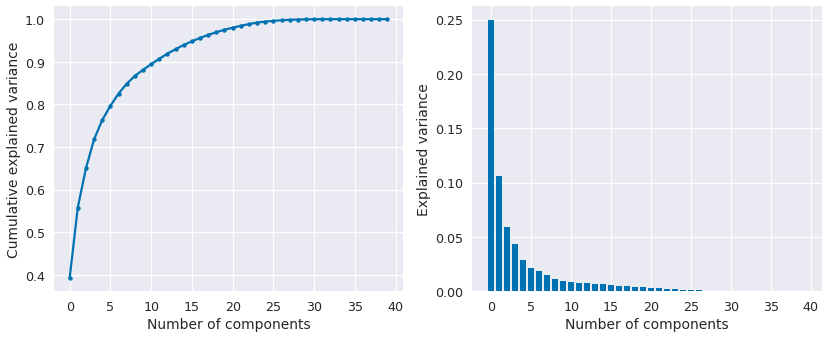

In [824]:
pca = PCA().fit(df_final)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), dpi=70, facecolor='w', edgecolor='k')
ax0, ax1 = axes.flatten()

sns.set('talk', palette='colorblind')

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

ax0.plot(np.cumsum(pca.explained_variance_ratio_), marker='.')
ax0.set_xlabel('Number of components')
ax0.set_ylabel('Cumulative explained variance');

ax1.bar(range(df_final.shape[1]),pca.explained_variance_)
ax1.set_xlabel('Number of components')
ax1.set_ylabel('Explained variance');

plt.tight_layout()
plt.show()

In [825]:
n_PCA_90 = np.size(np.cumsum(pca.explained_variance_ratio_)>0.9) - np.count_nonzero(np.cumsum(pca.explained_variance_ratio_)>0.9)

print("Need: " + format(n_PCA_90) + " components to cover 90% of variance.")



Need: 11 components to cover 90% of variance.


/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


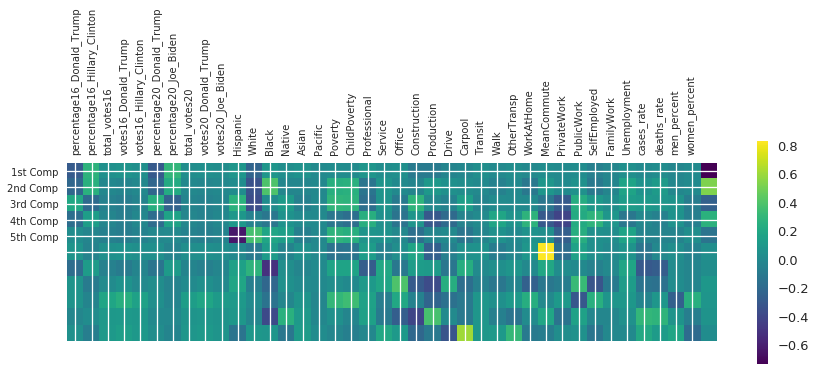

In [826]:
pca = PCA(11).fit(df_final)

X_pca=pca.transform(df_final) 

plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3,4,5],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(df.columns)),df.columns,fontsize=10,rotation=90)
plt.tight_layout()
plt.show()

In [827]:
PCA_vars = [0]*len(df_final.columns)

def ExtractColumn(lst,j): 
    return [item[j] for item in lst] 

for i, feature in zip(range(len(df.columns)),df.columns):
    x = ExtractColumn(pca.components_,i-1)
    if ((max(x) > 0.2) | (min(x) < -0.2)):
        if abs(max(x)) > abs(min(x)):
            PCA_vars[i] = max(x)
        else:
            PCA_vars[i] = min(x)                 
    else:
        PCA_vars[i] = 0

PCA_vars = pd.DataFrame(list(zip(df_final.columns,PCA_vars)),columns=('Name','Max absolute contribution'),index=range(1,41,1))      
PCA_vars = (PCA_vars[(PCA_vars['Max absolute contribution']!=0)]).sort_values(by='Max absolute contribution',ascending=False)
PCA_vars

,Name,Max absolute contribution
31,PrivateWork,0.828690
26,Transit,0.605653
22,Construction,0.393574
24,Drive,0.373126
13,Black,0.369373
19,Professional,0.341196
33,SelfEmployed,0.317437
29,WorkAtHome,0.304277
37,deaths_rate,0.302476
18,ChildPoverty,0.302208


In [828]:
df_final.head()

percentage16_Donald_Trump  percentage16_Hillary_Clinton  \
state   county                                                             
Alabama Autauga                   0.748799                      0.241484   
        Baldwin                   0.793843                      0.190529   
        Barbour                   0.505335                      0.504911   
        Bibb                      0.789411                      0.212072   
        Blount                    0.937641                      0.061789   

                 total_votes16  votes16_Donald_Trump  votes16_Hillary_Clinton  \
state   county                                                                  
Alabama Autauga       0.010629              0.030577                 0.003568   
        Baldwin       0.040630              0.123174                 0.011123   
        Barbour       0.004462              0.009102                 0.002928   
        Bibb          0.003752              0.011307                 0.001130   
        Blount        0.010941              0.038534                 0.001297   

                 percentage20_Donald_Trump  percentage20_Joe_Biden  \
state   county                                                       
Alabama Autauga                   0.717614                0.275705   
        Baldwin                   0.771725                0.222451   
        Barbour                   0.512673                0.491519   
        Bibb                      0.796825                0.203490   
        Blount                    0.924329                0.074820   

                 total_votes20  votes20_Donald_Trump  votes20_Joe_Biden  ...  \
state   county                                                           ...   
Alabama Autauga       0.006660              0.017799           0.002526  ...   
        Baldwin       0.026300              0.074971           0.008258  ...   
        Barbour       0.002510              0.005009           0.001618  ...   
        Bibb          0.002296              0.006728           0.000671  ...   
        Blount        0.006617              0.022163           0.000890  ...   

                 PrivateWork  PublicWork  SelfEmployed  FamilyWork  \
state   county                                                       
Alabama Autauga     0.740741    0.293135      0.147368      0.0125   
        Baldwin     0.857143    0.157699      0.165789      0.0125   
        Barbour     0.740741    0.272727      0.171053      0.0375   
        Bibb        0.774250    0.241187      0.165789      0.0375   
        Blount      0.913580    0.139147      0.105263      0.0125   

                 Unemployment  cases_rate  deaths_rate  men_percent  \
state   county                                                        
Alabama Autauga      0.181185    0.194740     0.088130     0.147038   
        Baldwin      0.191638    0.168221     0.056934     0.148800   
        Barbour      0.432056    0.199346     0.053744     0.266240   
        Bibb         0.285714    0.193298     0.103938     0.290647   
        Blount       0.170732    0.185351     0.067830     0.161159   

                 women_percent  Party_Cluster  
state   county                                 
Alabama Autauga       0.852962              1  
        Baldwin       0.851200              0  
        Barbour       0.733760              1  
        Bibb          0.709353              1  
        Blount        0.838841              1  

[5 rows x 40 columns]

In [829]:
df.head()

percentage16_Donald_Trump  percentage16_Hillary_Clinton  \
state   county                                                             
Alabama Autauga                  73.435789                     23.956855   
        Baldwin                  77.351472                     19.565310   
        Barbour                  52.271415                     46.660250   
        Bibb                     76.966164                     21.422039   
        Blount                   89.851875                      8.469902   

                 total_votes16  votes16_Donald_Trump  votes16_Hillary_Clinton  \
state   county                                                                  
Alabama Autauga        24661.0               18110.0                   5908.0   
        Baldwin        94090.0               72780.0                  18409.0   
        Barbour        10390.0                5431.0                   4848.0   
        Bibb            8748.0                6733.0                   1874.0   
        Blount         25384.0               22808.0                   2150.0   

                 percentage20_Donald_Trump  percentage20_Joe_Biden  \
state   county                                                       
Alabama Autauga                  71.507652               26.954666   
        Baldwin                  76.235715               22.345220   
        Barbour                  53.600459               45.634503   
        Bibb                     78.428915               20.704064   
        Blount                   89.569904                9.566991   

                 total_votes20  votes20_Donald_Trump  votes20_Joe_Biden  ...  \
state   county                                                           ...   
Alabama Autauga        27639.0               19764.0             7450.0  ...   
        Baldwin       108945.0               83055.0            24344.0  ...   
        Barbour        10457.0                5605.0             4772.0  ...   
        Bibb            9573.0                7508.0             1982.0  ...   
        Blount         27459.0               24595.0             2627.0  ...   

                 MeanCommute  PrivateWork  PublicWork  SelfEmployed  \
state   county                                                        
Alabama Autauga         25.8         74.1        20.2           5.6   
        Baldwin         27.0         80.7        12.9           6.3   
        Barbour         23.4         74.1        19.1           6.5   
        Bibb            30.0         76.0        17.4           6.3   
        Blount          35.0         83.9        11.9           4.0   

                 FamilyWork  Unemployment  cases_rate  deaths_rate  \
state   county                                                       
Alabama Autauga         0.1           5.2    4.015553     0.056327   
        Baldwin         0.1           5.5    3.468725     0.036389   
        Barbour         0.3          12.4    4.110530     0.034350   
        Bibb            0.3           8.2    3.985828     0.066430   
        Blount          0.1           4.9    3.821943     0.043352   

                 men_percent  women_percent  
state   county                               
Alabama Autauga    48.875282      51.124718  
        Baldwin    48.941286      51.058714  
        Barbour    53.341476      46.658524  
        Bibb       54.255979      45.744021  
        Blount     49.404339      50.595661  

[5 rows x 39 columns]

In [830]:
df_null = df[df.isnull().any(axis=1)]
Null_county = np.array(df_null.index.get_level_values('county'))


In [831]:
df_estimation = df.drop(Null_county, level='county')

df_estimation.head()

percentage16_Donald_Trump  percentage16_Hillary_Clinton  \
state   county                                                             
Alabama Autauga                  73.435789                     23.956855   
        Baldwin                  77.351472                     19.565310   
        Barbour                  52.271415                     46.660250   
        Bibb                     76.966164                     21.422039   
        Blount                   89.851875                      8.469902   

                 total_votes16  votes16_Donald_Trump  votes16_Hillary_Clinton  \
state   county                                                                  
Alabama Autauga        24661.0               18110.0                   5908.0   
        Baldwin        94090.0               72780.0                  18409.0   
        Barbour        10390.0                5431.0                   4848.0   
        Bibb            8748.0                6733.0                   1874.0   
        Blount         25384.0               22808.0                   2150.0   

                 percentage20_Donald_Trump  percentage20_Joe_Biden  \
state   county                                                       
Alabama Autauga                  71.507652               26.954666   
        Baldwin                  76.235715               22.345220   
        Barbour                  53.600459               45.634503   
        Bibb                     78.428915               20.704064   
        Blount                   89.569904                9.566991   

                 total_votes20  votes20_Donald_Trump  votes20_Joe_Biden  ...  \
state   county                                                           ...   
Alabama Autauga        27639.0               19764.0             7450.0  ...   
        Baldwin       108945.0               83055.0            24344.0  ...   
        Barbour        10457.0                5605.0             4772.0  ...   
        Bibb            9573.0                7508.0             1982.0  ...   
        Blount         27459.0               24595.0             2627.0  ...   

                 MeanCommute  PrivateWork  PublicWork  SelfEmployed  \
state   county                                                        
Alabama Autauga         25.8         74.1        20.2           5.6   
        Baldwin         27.0         80.7        12.9           6.3   
        Barbour         23.4         74.1        19.1           6.5   
        Bibb            30.0         76.0        17.4           6.3   
        Blount          35.0         83.9        11.9           4.0   

                 FamilyWork  Unemployment  cases_rate  deaths_rate  \
state   county                                                       
Alabama Autauga         0.1           5.2    4.015553     0.056327   
        Baldwin         0.1           5.5    3.468725     0.036389   
        Barbour         0.3          12.4    4.110530     0.034350   
        Bibb            0.3           8.2    3.985828     0.066430   
        Blount          0.1           4.9    3.821943     0.043352   

                 men_percent  women_percent  
state   county                               
Alabama Autauga    48.875282      51.124718  
        Baldwin    48.941286      51.058714  
        Barbour    53.341476      46.658524  
        Bibb       54.255979      45.744021  
        Blount     49.404339      50.595661  

[5 rows x 39 columns]

In [832]:
df_final_estimation = df_final.drop(Null_county, level='county')
df_final_estimation.head()

percentage16_Donald_Trump  percentage16_Hillary_Clinton  \
state   county                                                             
Alabama Autauga                   0.748799                      0.241484   
        Baldwin                   0.793843                      0.190529   
        Barbour                   0.505335                      0.504911   
        Bibb                      0.789411                      0.212072   
        Blount                    0.937641                      0.061789   

                 total_votes16  votes16_Donald_Trump  votes16_Hillary_Clinton  \
state   county                                                                  
Alabama Autauga       0.010629              0.030577                 0.003568   
        Baldwin       0.040630              0.123174                 0.011123   
        Barbour       0.004462              0.009102                 0.002928   
        Bibb          0.003752              0.011307                 0.001130   
        Blount        0.010941              0.038534                 0.001297   

                 percentage20_Donald_Trump  percentage20_Joe_Biden  \
state   county                                                       
Alabama Autauga                   0.717614                0.275705   
        Baldwin                   0.771725                0.222451   
        Barbour                   0.512673                0.491519   
        Bibb                      0.796825                0.203490   
        Blount                    0.924329                0.074820   

                 total_votes20  votes20_Donald_Trump  votes20_Joe_Biden  ...  \
state   county                                                           ...   
Alabama Autauga       0.006660              0.017799           0.002526  ...   
        Baldwin       0.026300              0.074971           0.008258  ...   
        Barbour       0.002510              0.005009           0.001618  ...   
        Bibb          0.002296              0.006728           0.000671  ...   
        Blount        0.006617              0.022163           0.000890  ...   

                 PrivateWork  PublicWork  SelfEmployed  FamilyWork  \
state   county                                                       
Alabama Autauga     0.740741    0.293135      0.147368      0.0125   
        Baldwin     0.857143    0.157699      0.165789      0.0125   
        Barbour     0.740741    0.272727      0.171053      0.0375   
        Bibb        0.774250    0.241187      0.165789      0.0375   
        Blount      0.913580    0.139147      0.105263      0.0125   

                 Unemployment  cases_rate  deaths_rate  men_percent  \
state   county                                                        
Alabama Autauga      0.181185    0.194740     0.088130     0.147038   
        Baldwin      0.191638    0.168221     0.056934     0.148800   
        Barbour      0.432056    0.199346     0.053744     0.266240   
        Bibb         0.285714    0.193298     0.103938     0.290647   
        Blount       0.170732    0.185351     0.067830     0.161159   

                 women_percent  Party_Cluster  
state   county                                 
Alabama Autauga       0.852962              1  
        Baldwin       0.851200              0  
        Barbour       0.733760              1  
        Bibb          0.709353              1  
        Blount        0.838841              1  

[5 rows x 40 columns]

In [833]:
Response_origin = pd.DataFrame(df_estimation['percentage20_Donald_Trump']) 

Response_origin.head()

percentage20_Donald_Trump
state   county                            
Alabama Autauga                  71.507652
        Baldwin                  76.235715
        Barbour                  53.600459
        Bibb                     78.428915
        Blount                   89.569904

In [834]:
Response = pd.DataFrame(df_final_estimation['percentage20_Donald_Trump']) 
            # + df_final_estimation['percentage16_Donald_Trump']
             #, columns=["Response"])
        
Response = minmax_scaling(Response, columns=Response.columns)



In [835]:
Response.head()

percentage20_Donald_Trump
state   county                            
Alabama Autauga                   0.717614
        Baldwin                   0.771725
        Barbour                   0.512673
        Bibb                      0.796825
        Blount                    0.924329

In [836]:
votes = df_final.iloc[:,2:10].columns
votes

Index(['total_votes16', 'votes16_Donald_Trump', 'votes16_Hillary_Clinton',
       'percentage20_Donald_Trump', 'percentage20_Joe_Biden', 'total_votes20',
       'votes20_Donald_Trump', 'votes20_Joe_Biden'],
      dtype='object')

In [837]:
df_estimation = df_estimation.drop(votes, axis=1)

df_estimation.head()

percentage16_Donald_Trump  percentage16_Hillary_Clinton  \
state   county                                                             
Alabama Autauga                  73.435789                     23.956855   
        Baldwin                  77.351472                     19.565310   
        Barbour                  52.271415                     46.660250   
        Bibb                     76.966164                     21.422039   
        Blount                   89.851875                      8.469902   

                 Hispanic  White  Black  Native  Asian  Pacific  Poverty  \
state   county                                                             
Alabama Autauga       2.7   75.4   18.9     0.3    0.9      0.0     13.7   
        Baldwin       4.4   83.1    9.5     0.8    0.7      0.0     11.8   
        Barbour       4.2   45.7   47.8     0.2    0.6      0.0     27.2   
        Bibb          2.4   74.6   22.0     0.4    0.0      0.0     15.2   
        Blount        9.0   87.4    1.5     0.3    0.1      0.0     15.6   

                 ChildPoverty  ...  MeanCommute  PrivateWork  PublicWork  \
state   county                 ...                                         
Alabama Autauga          20.1  ...         25.8         74.1        20.2   
        Baldwin          16.1  ...         27.0         80.7        12.9   
        Barbour          44.9  ...         23.4         74.1        19.1   
        Bibb             26.6  ...         30.0         76.0        17.4   
        Blount           25.4  ...         35.0         83.9        11.9   

                 SelfEmployed  FamilyWork  Unemployment  cases_rate  \
state   county                                                        
Alabama Autauga           5.6         0.1           5.2    4.015553   
        Baldwin           6.3         0.1           5.5    3.468725   
        Barbour           6.5         0.3          12.4    4.110530   
        Bibb              6.3         0.3           8.2    3.985828   
        Blount            4.0         0.1           4.9    3.821943   

                 deaths_rate  men_percent  women_percent  
state   county                                            
Alabama Autauga     0.056327    48.875282      51.124718  
        Baldwin     0.036389    48.941286      51.058714  
        Barbour     0.034350    53.341476      46.658524  
        Bibb        0.066430    54.255979      45.744021  
        Blount      0.043352    49.404339      50.595661  

[5 rows x 31 columns]

In [838]:
df_final_estimation = df_final_estimation.drop(votes, axis=1)

df_final_estimation.head()

percentage16_Donald_Trump  percentage16_Hillary_Clinton  \
state   county                                                             
Alabama Autauga                   0.748799                      0.241484   
        Baldwin                   0.793843                      0.190529   
        Barbour                   0.505335                      0.504911   
        Bibb                      0.789411                      0.212072   
        Blount                    0.937641                      0.061789   

                 Hispanic     White     Black    Native     Asian  Pacific  \
state   county                                                               
Alabama Autauga  0.027218  0.752515  0.217491  0.003676  0.021531      0.0   
        Baldwin  0.044355  0.829980  0.109321  0.009804  0.016746      0.0   
        Barbour  0.042339  0.453722  0.550058  0.002451  0.014354      0.0   
        Bibb     0.024194  0.744467  0.253165  0.004902  0.000000      0.0   
        Blount   0.090726  0.873239  0.017261  0.003676  0.002392      0.0   

                  Poverty  ChildPoverty  ...  PrivateWork  PublicWork  \
state   county                           ...                            
Alabama Autauga  0.227823      0.262745  ...     0.740741    0.293135   
        Baldwin  0.189516      0.210458  ...     0.857143    0.157699   
        Barbour  0.500000      0.586928  ...     0.740741    0.272727   
        Bibb     0.258065      0.347712  ...     0.774250    0.241187   
        Blount   0.266129      0.332026  ...     0.913580    0.139147   

                 SelfEmployed  FamilyWork  Unemployment  cases_rate  \
state   county                                                        
Alabama Autauga      0.147368      0.0125      0.181185    0.194740   
        Baldwin      0.165789      0.0125      0.191638    0.168221   
        Barbour      0.171053      0.0375      0.432056    0.199346   
        Bibb         0.165789      0.0375      0.285714    0.193298   
        Blount       0.105263      0.0125      0.170732    0.185351   

                 deaths_rate  men_percent  women_percent  Party_Cluster  
state   county                                                           
Alabama Autauga     0.088130     0.147038       0.852962              1  
        Baldwin     0.056934     0.148800       0.851200              0  
        Barbour     0.053744     0.266240       0.733760              1  
        Bibb        0.103938     0.290647       0.709353              1  
        Blount      0.067830     0.161159       0.838841              1  

[5 rows x 32 columns]

In [839]:
x_train,x_test,y_train,y_test = train_test_split(df_final_estimation, Response,test_size=0.2,random_state=0)


In [840]:
x_train_origin,x_test_origin,y_train_origin,y_test_origin = train_test_split(df_estimation, Response_origin,test_size=0.2,random_state=0)



In [841]:
ModelAverage = y_train.mean()
print(str(round(ModelAverage,5)))

percentage20_Donald_Trump    0.64985
dtype: float64


In [842]:
ModelAverage_origin = y_train_origin.mean()
print(str(round(ModelAverage,5)))

percentage20_Donald_Trump    0.64985
dtype: float64


In [843]:
RMSE = y_test
RMSE.insert(1, "Model_Average_Trump", ModelAverage.values[0], True)
y_test=y_test.drop(['Model_Average_Trump'], axis=1)
RMSE.head(5)

,,percentage20_Donald_Trump,Model_Average_Trump
state,county,,
New Mexico,De Baca,0.732496,0.649853
Illinois,Saline,0.735554,0.649853
Arkansas,Lafayette,0.649822,0.649853
Colorado,Lincoln,0.820898,0.649853
Minnesota,Martin,0.674376,0.649853


In [844]:
RMSE_origin = y_test_origin
RMSE_origin.insert(1, "Model_Average_Trump", ModelAverage_origin.values[0], True)
y_test_origin=y_test_origin.drop(['Model_Average_Trump'], axis=1)
RMSE_origin.head()

,,percentage20_Donald_Trump,Model_Average_Trump
state,county,,
New Mexico,De Baca,72.807991,65.586883
Illinois,Saline,73.075187,65.586883
Arkansas,Lafayette,65.584173,65.586883
Colorado,Lincoln,80.532319,65.586883
Minnesota,Martin,67.729661,65.586883


In [845]:
y_train.head()

,,percentage20_Donald_Trump
state,county,
Tennessee,Trousdale,0.739445
Missouri,Webster,0.805858
Arkansas,Lawrence,0.792022
Texas,Victoria,0.680401
Missouri,Camden,0.768877


In [846]:
x_train.head()

,,percentage16_Donald_Trump,percentage16_Hillary_Clinton,Hispanic,White,Black,Native,Asian,Pacific,Poverty,ChildPoverty,...,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,cases_rate,deaths_rate,men_percent,women_percent,Party_Cluster
state,county,,,,,,,,,,,,,,,,,,,,,
Tennessee,Trousdale,0.672517,0.311750,0.011089,0.848089,0.131185,0.001225,0.007177,0.000000,0.219758,0.193464,...,0.779541,0.217069,0.200000,0.0000,0.285714,1.000000,0.178344,0.258437,0.741563,1
Missouri,Webster,0.788263,0.184102,0.020161,0.944668,0.013809,0.003676,0.007177,0.017544,0.322581,0.333333,...,0.843034,0.118738,0.242105,0.0125,0.167247,0.163471,0.070820,0.204842,0.795158,1
Arkansas,Lawrence,0.726374,0.221289,0.013105,0.957746,0.010357,0.006127,0.002392,0.000000,0.322581,0.274510,...,0.724868,0.282004,0.184211,0.0250,0.285714,0.260736,0.205171,0.160591,0.839409,1
Texas,Victoria,0.691875,0.294156,0.463710,0.450704,0.066743,0.001225,0.026316,0.000000,0.250000,0.271895,...,0.853616,0.129870,0.205263,0.0375,0.177700,0.229134,0.167543,0.148797,0.851203,1
Missouri,Camden,0.771175,0.209675,0.027218,0.944668,0.008055,0.007353,0.014354,0.000000,0.304435,0.372549,...,0.832451,0.133581,0.236842,0.0125,0.278746,0.185639,0.125574,0.170422,0.829578,1


In [847]:
Model_GLM = sm.GLM(y_train, x_train,family=sm.families.Gaussian())

Model_GLM_fit = Model_GLM.fit()


In [848]:
print(Model_GLM_fit.summary())

                     Generalized Linear Model Regression Results                     
Dep. Variable:     percentage20_Donald_Trump   No. Observations:                 2364
Model:                                   GLM   Df Residuals:                     2332
Model Family:                       Gaussian   Df Model:                           31
Link Function:                      identity   Scale:                      0.00097887
Method:                                 IRLS   Log-Likelihood:                 4851.9
Date:                       Sun, 13 Dec 2020   Deviance:                       2.2827
Time:                               13:04:33   Pearson chi2:                     2.28
No. Iterations:                            3                                         
Covariance Type:                   nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------

In [849]:
x_test.head()

,,percentage16_Donald_Trump,percentage16_Hillary_Clinton,Hispanic,White,Black,Native,Asian,Pacific,Poverty,ChildPoverty,...,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,cases_rate,deaths_rate,men_percent,women_percent,Party_Cluster
state,county,,,,,,,,,,,,,,,,,,,,,
New Mexico,De Baca,0.688302,0.209676,0.463710,0.519115,0.017261,0.000000,0.000000,0.000000,0.409274,0.292810,...,0.499118,0.578850,0.105263,0.0000,0.229965,0.007217,0.000000,0.068498,0.931502,1
Illinois,Saline,0.748617,0.226992,0.017137,0.915493,0.039125,0.001225,0.016746,0.000000,0.366935,0.352941,...,0.774250,0.241187,0.163158,0.0625,0.393728,0.133598,0.070449,0.156627,0.843373,1
Arkansas,Lafayette,0.611379,0.382623,0.012097,0.590543,0.434983,0.003676,0.009569,0.000000,0.431452,0.422222,...,0.673721,0.300557,0.215789,0.1125,0.289199,0.142374,0.066570,0.152263,0.847737,1
Colorado,Lincoln,0.801035,0.156252,0.228831,0.661972,0.103567,0.012255,0.004785,0.026316,0.233871,0.197386,...,0.412698,0.458256,0.381579,0.1125,0.128920,0.021964,0.000000,0.545490,0.454510,1
Minnesota,Martin,0.680014,0.266416,0.041331,0.935614,0.003452,0.001225,0.021531,0.000000,0.179435,0.198693,...,0.883598,0.081633,0.231579,0.0375,0.108014,0.159127,0.140226,0.173469,0.826531,1


In [850]:
y_test.head()

,,percentage20_Donald_Trump
state,county,
New Mexico,De Baca,0.732496
Illinois,Saline,0.735554
Arkansas,Lafayette,0.649822
Colorado,Lincoln,0.820898
Minnesota,Martin,0.674376


In [851]:
RMSE.insert(2, "Model_GLM_Trump", Model_GLM_fit.predict(x_test).values, True)

In [852]:
RMSE.head()

,,percentage20_Donald_Trump,Model_Average_Trump,Model_GLM_Trump
state,county,,,
New Mexico,De Baca,0.732496,0.649853,0.737774
Illinois,Saline,0.735554,0.649853,0.757657
Arkansas,Lafayette,0.649822,0.649853,0.627183
Colorado,Lincoln,0.820898,0.649853,0.808537
Minnesota,Martin,0.674376,0.649853,0.688849


In [859]:
Model_RLM = sm.RLM(y_train, x_train)

Model_RLM_fit = Model_RLM.fit()



In [860]:
print(Model_RLM_fit.summary())

                        Robust linear Model Regression Results                       
Dep. Variable:     percentage20_Donald_Trump   No. Observations:                 2364
Model:                                   RLM   Df Residuals:                     2332
Method:                                 IRLS   Df Model:                           31
Norm:                                 HuberT                                         
Scale Est.:                              mad                                         
Cov Type:                                 H1                                         
Date:                       Sun, 13 Dec 2020                                         
Time:                               13:18:53                                         
No. Iterations:                           50                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------

In [861]:
RMSE.insert(3, "Model_RLM_Trump", Model_RLM_fit.predict(x_test).values, True)

In [862]:
RMSE.head()

,,percentage20_Donald_Trump,Model_Average_Trump,Model_GLM_Trump,Model_RLM_Trump
state,county,,,,
New Mexico,De Baca,0.732496,0.649853,0.737774,0.728339
Illinois,Saline,0.735554,0.649853,0.757657,0.758150
Arkansas,Lafayette,0.649822,0.649853,0.627183,0.627234
Colorado,Lincoln,0.820898,0.649853,0.808537,0.808237
Minnesota,Martin,0.674376,0.649853,0.688849,0.689165


In [881]:

rmse1 = mean_squared_error(RMSE['Model_Average_Trump'], RMSE['percentage20_Donald_Trump'] ,squared=False)

print("Root mean square error for the average response is: ", rmse1)



Root mean square error for the average response is:  0.17618438429977545


In [882]:

rmse2 = mean_squared_error(RMSE['Model_GLM_Trump'], RMSE['percentage20_Donald_Trump'] ,squared=False)


print("Root mean square error by using Generalized Linear Regression Model is: ", rmse2)



Root mean square error by using Generalized Linear Regression Model is:  0.02857160110101859


In [899]:

rmse3 = mean_squared_error(RMSE['Model_RLM_Trump'], RMSE['percentage20_Donald_Trump'] ,squared=False)


print("Root mean square error by using Robust Linear Regression Model is: ", rmse3)

Root mean square error by using Robust Linear Regression Model is:  0.02850639358265002


### Not Scaled Model below

In [869]:
y_train_origin.head()

,,percentage20_Donald_Trump
state,county,
Tennessee,Trousdale,73.415184
Missouri,Webster,79.218151
Arkansas,Lawrence,78.009220
Texas,Victoria,68.256103
Missouri,Camden,75.986922


In [870]:
x_train_origin.head()

,,percentage16_Donald_Trump,percentage16_Hillary_Clinton,Hispanic,White,Black,Native,Asian,Pacific,Poverty,ChildPoverty,...,MeanCommute,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,cases_rate,deaths_rate,men_percent,women_percent
state,county,,,,,,,,,,,,,,,,,,,,,
Tennessee,Trousdale,66.804583,30.012731,1.1,84.9,11.4,0.1,0.3,0.0,13.3,14.8,...,29.2,76.3,16.1,7.6,0.0,8.2,20.620084,0.113986,53.049128,46.950872
Missouri,Webster,76.866387,19.011384,2.0,94.5,1.2,0.3,0.3,0.2,18.4,25.5,...,28.9,79.9,10.8,9.2,0.1,4.8,3.370787,0.045263,51.041056,48.958944
Arkansas,Lawrence,71.486368,22.216359,1.3,95.8,0.9,0.5,0.1,0.0,18.4,21.0,...,26.1,73.2,19.6,7.0,0.2,8.2,5.376408,0.131132,49.383084,50.616916
Texas,Victoria,68.487368,28.496391,46.0,45.4,5.8,0.1,1.1,0.0,14.8,20.8,...,20.0,80.5,11.4,7.8,0.3,5.1,4.724754,0.107083,48.941192,51.058808
Missouri,Camden,75.380940,21.215400,2.7,94.5,0.7,0.6,0.6,0.0,17.5,28.5,...,22.4,79.3,11.6,9.0,0.1,8.0,3.827890,0.080259,49.751421,50.248579


In [871]:
Model_GLM_origin = sm.GLM(y_train_origin, x_train_origin,family=sm.families.Gaussian())

Model_GLM_fit_origin = Model_GLM_origin.fit()

In [872]:
print(Model_GLM_fit_origin.summary())

                     Generalized Linear Model Regression Results                     
Dep. Variable:     percentage20_Donald_Trump   No. Observations:                 2364
Model:                                   GLM   Df Residuals:                     2333
Model Family:                       Gaussian   Df Model:                           30
Link Function:                      identity   Scale:                          7.4715
Method:                                 IRLS   Log-Likelihood:                -5715.9
Date:                       Sun, 13 Dec 2020   Deviance:                       17431.
Time:                               13:27:32   Pearson chi2:                 1.74e+04
No. Iterations:                            3                                         
Covariance Type:                   nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------

In [873]:
x_test_origin.head()

,,percentage16_Donald_Trump,percentage16_Hillary_Clinton,Hispanic,White,Black,Native,Asian,Pacific,Poverty,ChildPoverty,...,MeanCommute,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,cases_rate,deaths_rate,men_percent,women_percent
state,county,,,,,,,,,,,,,,,,,,,,,
New Mexico,De Baca,68.176796,21.215470,46.0,52.2,1.5,0.0,0.0,0.0,22.7,22.4,...,10.3,60.4,35.6,4.0,0.0,6.6,0.148810,0.000000,45.932540,54.067460
Illinois,Saline,73.419975,22.707851,1.7,91.6,3.4,0.1,0.7,0.0,20.6,27.0,...,23.1,76.0,17.4,6.2,0.5,11.3,2.754810,0.045027,49.234548,50.765452
Arkansas,Lafayette,61.489810,36.120871,1.2,59.3,37.8,0.3,0.4,0.0,23.8,32.3,...,25.1,70.3,20.6,8.2,0.9,8.3,2.935754,0.042547,49.071054,50.928946
Colorado,Lincoln,77.976686,16.611157,22.7,66.4,9.0,1.0,0.2,0.3,14.0,15.1,...,17.3,55.5,29.1,14.5,0.9,3.7,0.452899,0.000000,63.804348,36.195652
Minnesota,Martin,67.456300,26.105645,4.1,93.6,0.3,0.1,0.9,0.0,11.3,15.2,...,17.0,82.2,8.8,8.8,0.3,3.1,3.281219,0.089624,49.865565,50.134435


In [874]:
y_test_origin.head()

,,percentage20_Donald_Trump
state,county,
New Mexico,De Baca,72.807991
Illinois,Saline,73.075187
Arkansas,Lafayette,65.584173
Colorado,Lincoln,80.532319
Minnesota,Martin,67.729661


In [875]:
RMSE_origin.insert(2, "Model_GLM_Trump", Model_GLM_fit_origin.predict(x_test_origin).values, True)

In [876]:
RMSE_origin.head()

,,percentage20_Donald_Trump,Model_Average_Trump,Model_GLM_Trump
state,county,,,
New Mexico,De Baca,72.807991,65.586883,73.251640
Illinois,Saline,73.075187,65.586883,74.996622
Arkansas,Lafayette,65.584173,65.586883,63.610829
Colorado,Lincoln,80.532319,65.586883,79.452636
Minnesota,Martin,67.729661,65.586883,68.972087


In [877]:
Model_RLM_origin = sm.RLM(y_train_origin, x_train_origin)

Model_RLM_fit_origin = Model_RLM_origin.fit()

In [878]:
print(Model_RLM_fit_origin.summary())

                        Robust linear Model Regression Results                       
Dep. Variable:     percentage20_Donald_Trump   No. Observations:                 2364
Model:                                   RLM   Df Residuals:                     2333
Method:                                 IRLS   Df Model:                           30
Norm:                                 HuberT                                         
Scale Est.:                              mad                                         
Cov Type:                                 H1                                         
Date:                       Sun, 13 Dec 2020                                         
Time:                               13:27:59                                         
No. Iterations:                           33                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------

In [879]:
RMSE_origin.insert(3, "Model_RLM_Trump", Model_RLM_fit_origin.predict(x_test_origin).values, True)


In [884]:
RMSE_origin.head()

,,percentage20_Donald_Trump,Model_Average_Trump,Model_GLM_Trump,Model_RLM_Trump
state,county,,,,
New Mexico,De Baca,72.807991,65.586883,73.251640,72.440118
Illinois,Saline,73.075187,65.586883,74.996622,75.035972
Arkansas,Lafayette,65.584173,65.586883,63.610829,63.616602
Colorado,Lincoln,80.532319,65.586883,79.452636,79.432277
Minnesota,Martin,67.729661,65.586883,68.972087,68.993832


In [891]:

rmse1_origin = mean_squared_error(RMSE_origin['Model_Average_Trump'], 
                                  RMSE_origin['percentage20_Donald_Trump'],squared=False)

print("Root mean square error for the average response is: ", rmse1_origin)

Root mean square error for the average response is:  15.394538208531928


In [893]:

rmse2_origin = mean_squared_error(RMSE_origin['Model_GLM_Trump'], 
                                  RMSE_origin['percentage20_Donald_Trump'],squared=False)


print("Root mean square error by using Generalized Linear Regression Model is: ", rmse2_origin)

Root mean square error by using Generalized Linear Regression Model is:  2.492202302942959


In [896]:

rmse3_origin = mean_squared_error(RMSE_origin['Model_RLM_Trump'], 
                                  RMSE_origin['percentage20_Donald_Trump'],squared=False)


print("Root mean square error by using Robust Linear Regression Model is: ", rmse3_origin)

Root mean square error by using Robust Linear Regression Model is:  2.4831652243722426


In [905]:
d_rmse = {'models': ['Average', 'GLM', 'RLM'],
          'not_scaled': [rmse1_origin, rmse2_origin, rmse3_origin],
          'scaled': [rmse1, rmse2, rmse3]}

df_rmse = pd.DataFrame(data = d_rmse,index=None)

print(df_rmse)

    models  not_scaled    scaled
0  Average   15.394538  0.176184
1      GLM    2.492202  0.028572
2      RLM    2.483165  0.028506


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


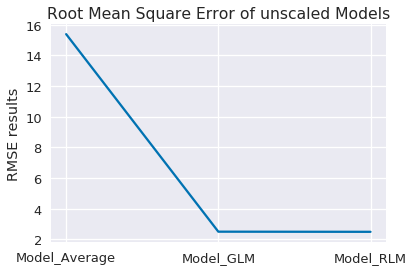

In [909]:
Results = pd.DataFrame({'RMSE': [rmse1_origin,rmse2_origin,rmse3_origin],
                        'Name': ['Model_Average','Model_GLM','Model_RLM']})
Results = Results.set_index('Name')


plt.plot(Results)
plt.title("Root Mean Square Error of unscaled Models")
plt.ylabel('RMSE results')
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


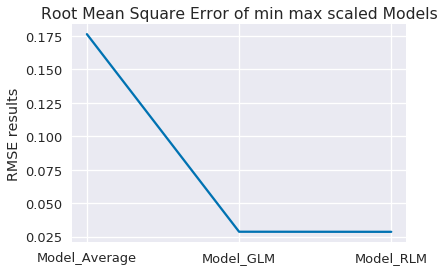

In [910]:
Results2 = pd.DataFrame({'RMSE': [rmse1,rmse2,rmse3],
                        'Name': ['Model_Average','Model_GLM','Model_RLM']})
Results2 = Results2.set_index('Name')

plt.plot(Results2)
plt.title("Root Mean Square Error of min max scaled Models")
plt.ylabel('RMSE results')
plt.show()